In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [ ]:
#load the dataset
df=pd.read_csv('/content/diabetes_012_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#check no. of rows and columns in dataset
df.shape

(253680, 22)

In [ ]:
#value count
attributes = ['Diabetes_012',	'HighBP',	'HighChol',	'CholCheck',	'BMI',	'Smoker',	'Stroke',	'HeartDiseaseorAttack',	'PhysActivity',	'Fruits','Veggies','HvyAlcoholConsump','AnyHealthcare',	'NoDocbcCost',	'GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk',	'Sex',	'Age',	'Education',	'Income']

for attribute in attributes:
    counts = df[attribute].value_counts()
    print(f"Value counts for {attribute}:\n{counts}\n")

Value counts for Diabetes_012:
0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

Value counts for HighBP:
0.0    144851
1.0    108829
Name: HighBP, dtype: int64

Value counts for HighChol:
0.0    146089
1.0    107591
Name: HighChol, dtype: int64

Value counts for CholCheck:
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64

Value counts for BMI:
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

Value counts for Smoker:
0.0    141257
1.0    112423
Name: Smoker, dtype: int64

Value counts for Stroke:
0.0    243388
1.0     10292
Name: Stroke, dtype: int64

Value counts for HeartDiseaseorAttack:
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

Value counts for PhysActivity:
1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64

Value counts for Fruits:
1.0    160898
0.0     92782
Name: Frui

In [ ]:
#checking if there are any null values or not
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
## can get the data types of columns of data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
# descriptive statistics
# statistical analysis of the data
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
#corellation
df.corr()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


 Data Visualization:

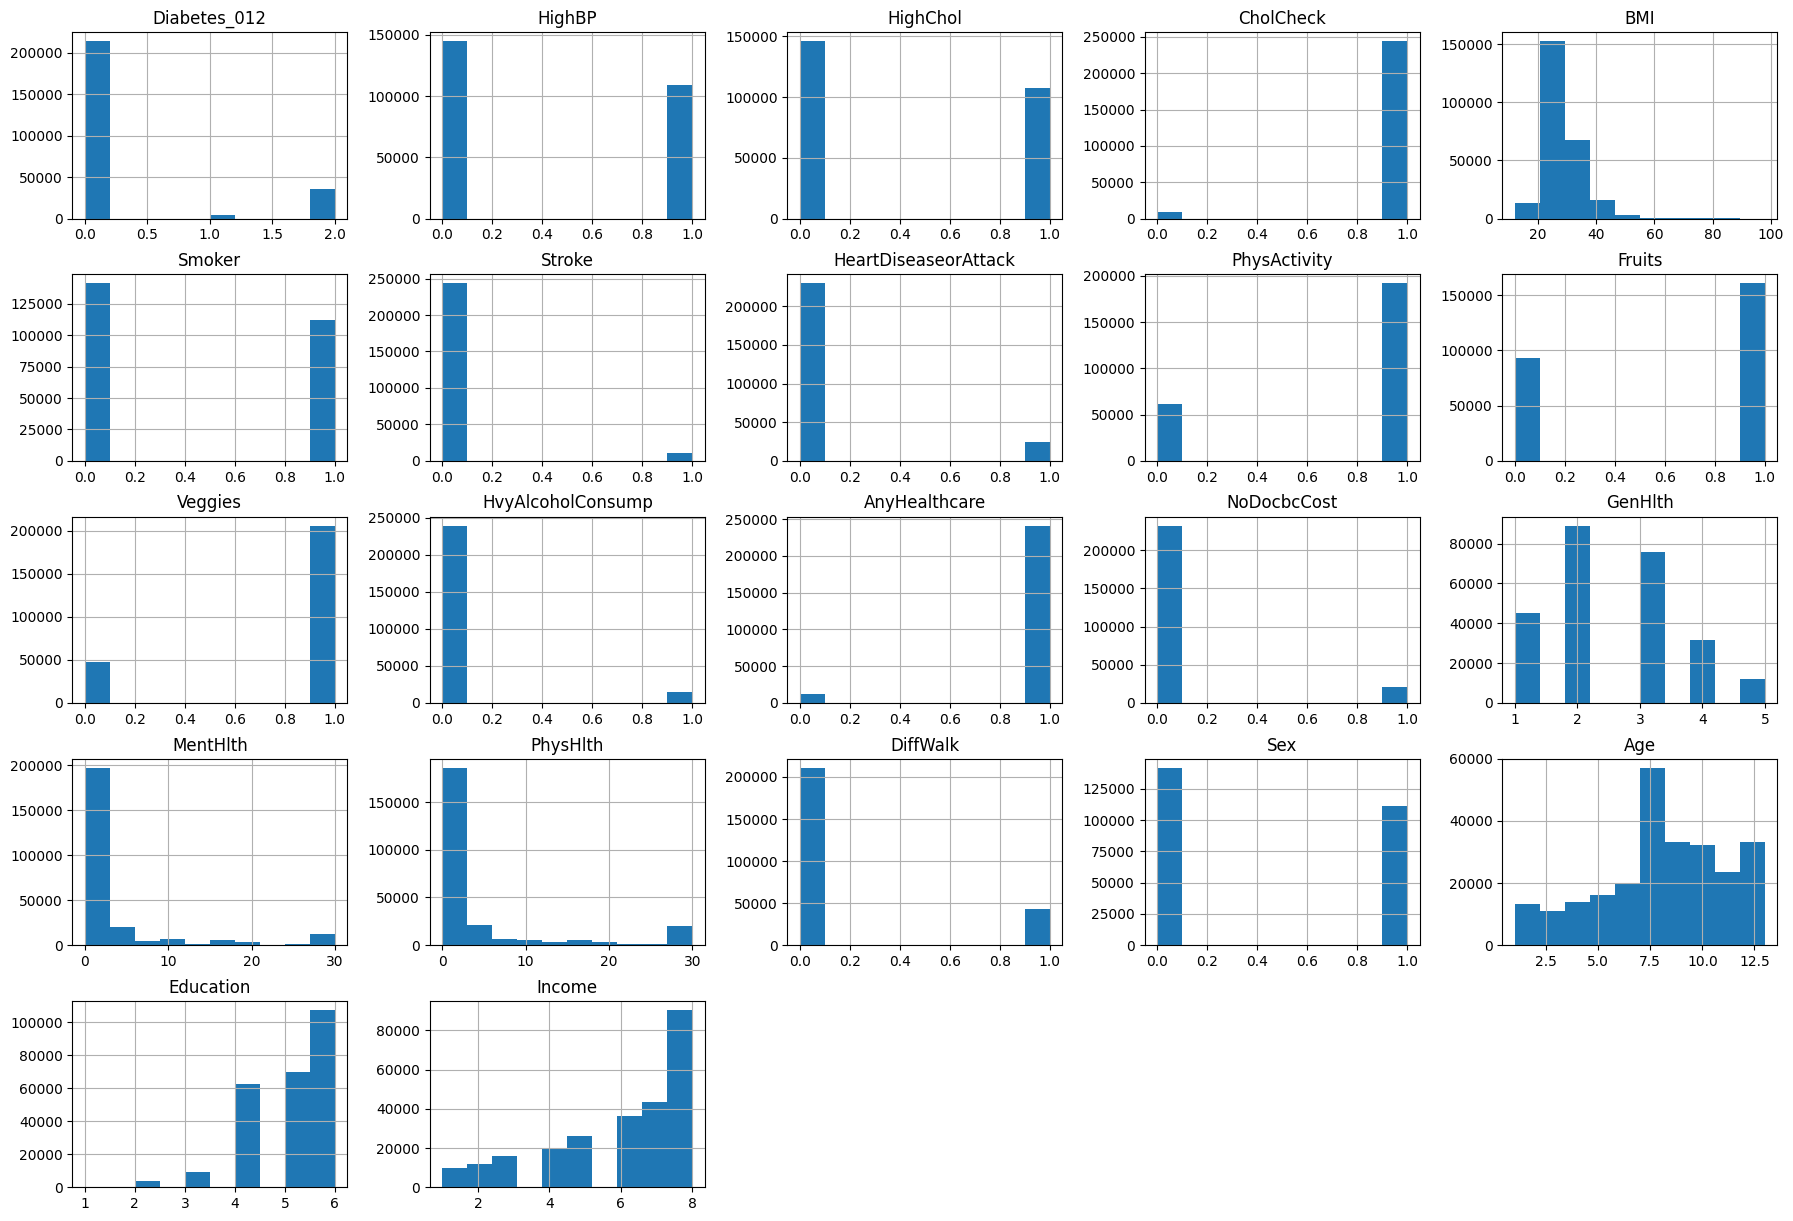

In [ ]:
# Histogram for a numerical column

df.hist(figsize=(22,15))
plt.show()

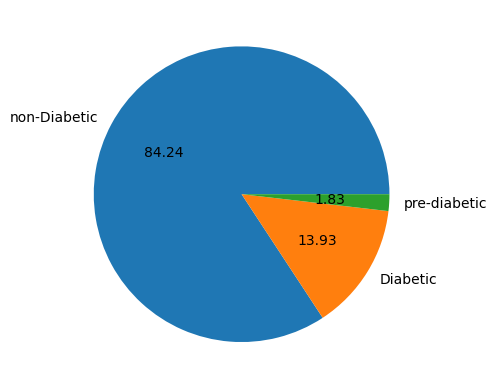

In [ ]:
# pie chart

labels=["non-Diabetic","Diabetic","pre-diabetic"]
plt.pie(df["Diabetes_012"].value_counts() , labels =labels ,autopct='%.02f' )
plt.show()

<ipython-input-23-560ed664496f>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Education[df.Diabetes_012 == 0], color="g", label="No Diabetic" )
<ipython-input-23-560ed664496f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Education[df.Diabetes_012 == 1], color="m", label="pre-Diabeti

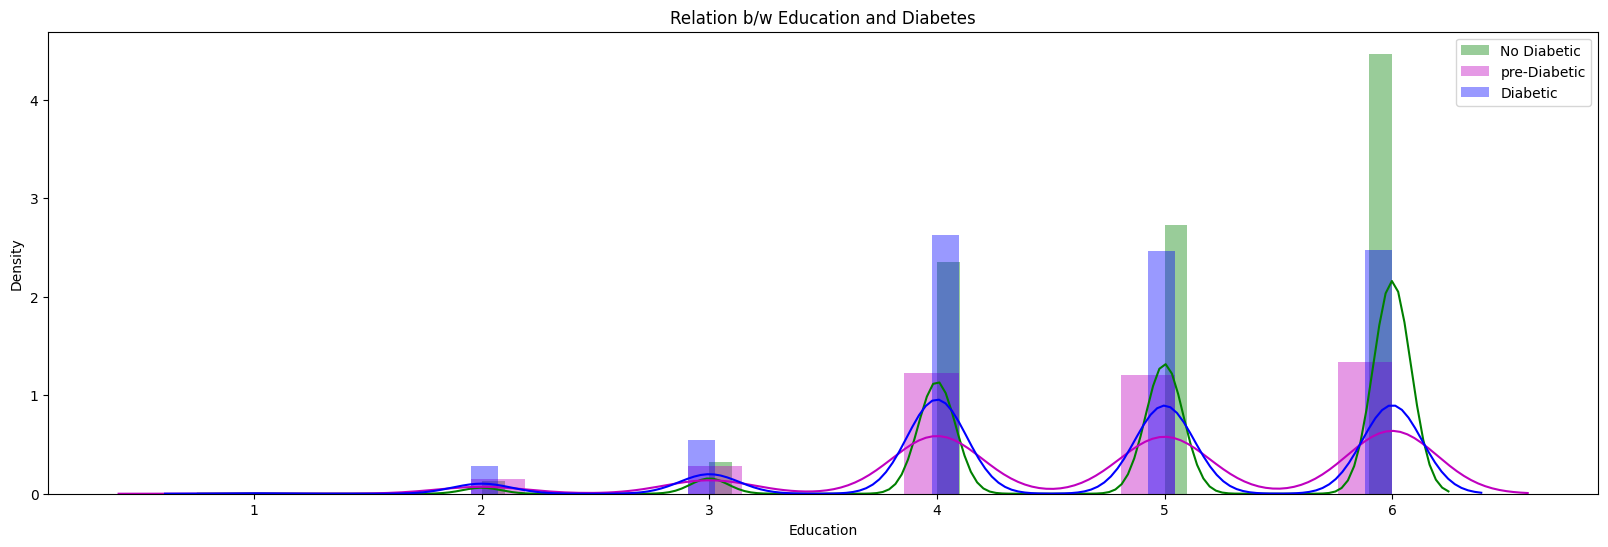

In [ ]:
#distplot - seeing ther relation between education and diabetes
plt.figure(figsize=(20,6))


sns.distplot(df.Education[df.Diabetes_012 == 0], color="g", label="No Diabetic" )
sns.distplot(df.Education[df.Diabetes_012 == 1], color="m", label="pre-Diabetic" )
sns.distplot(df.Education[df.Diabetes_012 == 2], color="b", label="Diabetic" )

plt.title("Relation b/w Education and Diabetes")

plt.legend()
plt.show()

<Figure size 500x300 with 0 Axes>

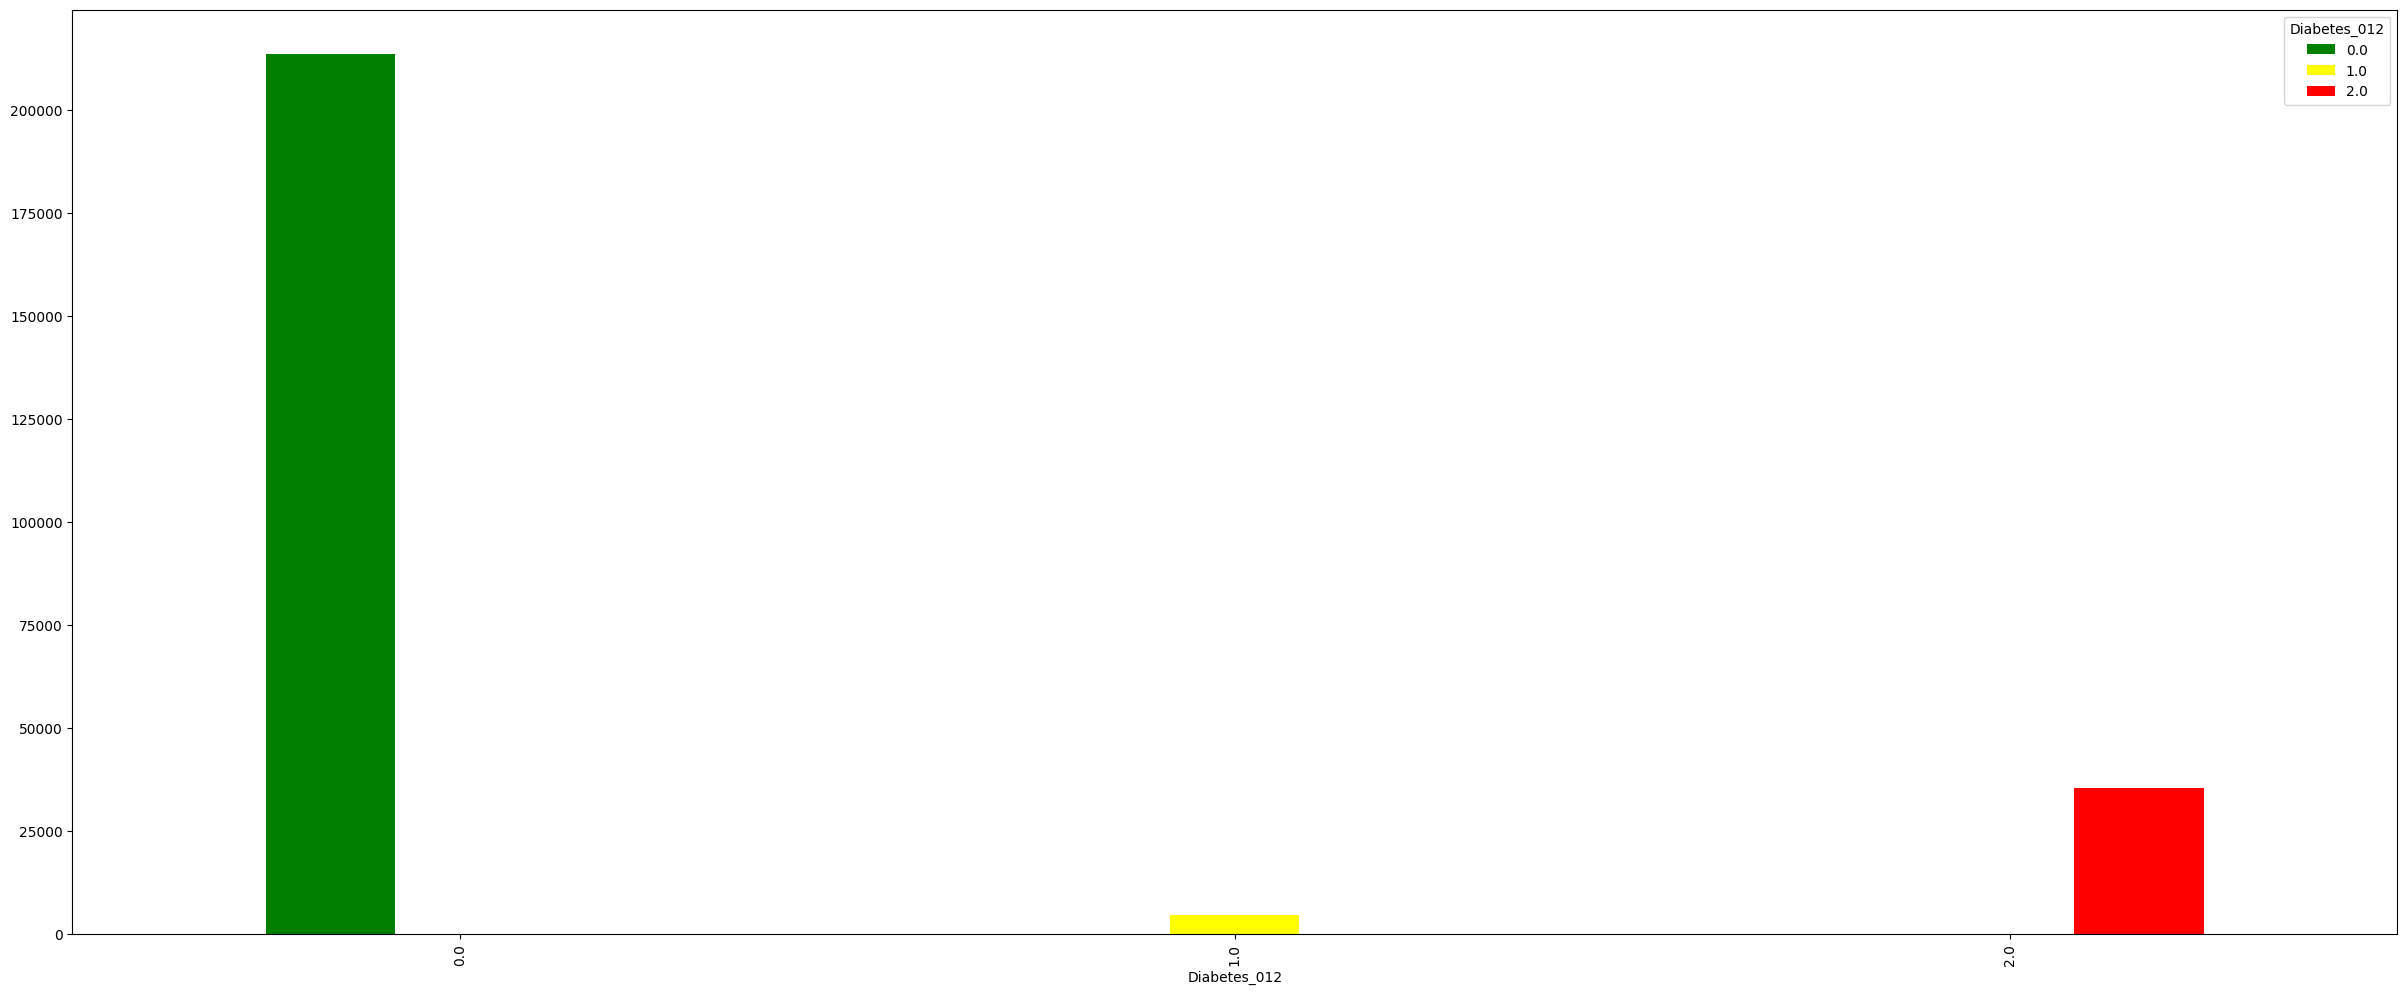

<Figure size 500x300 with 0 Axes>

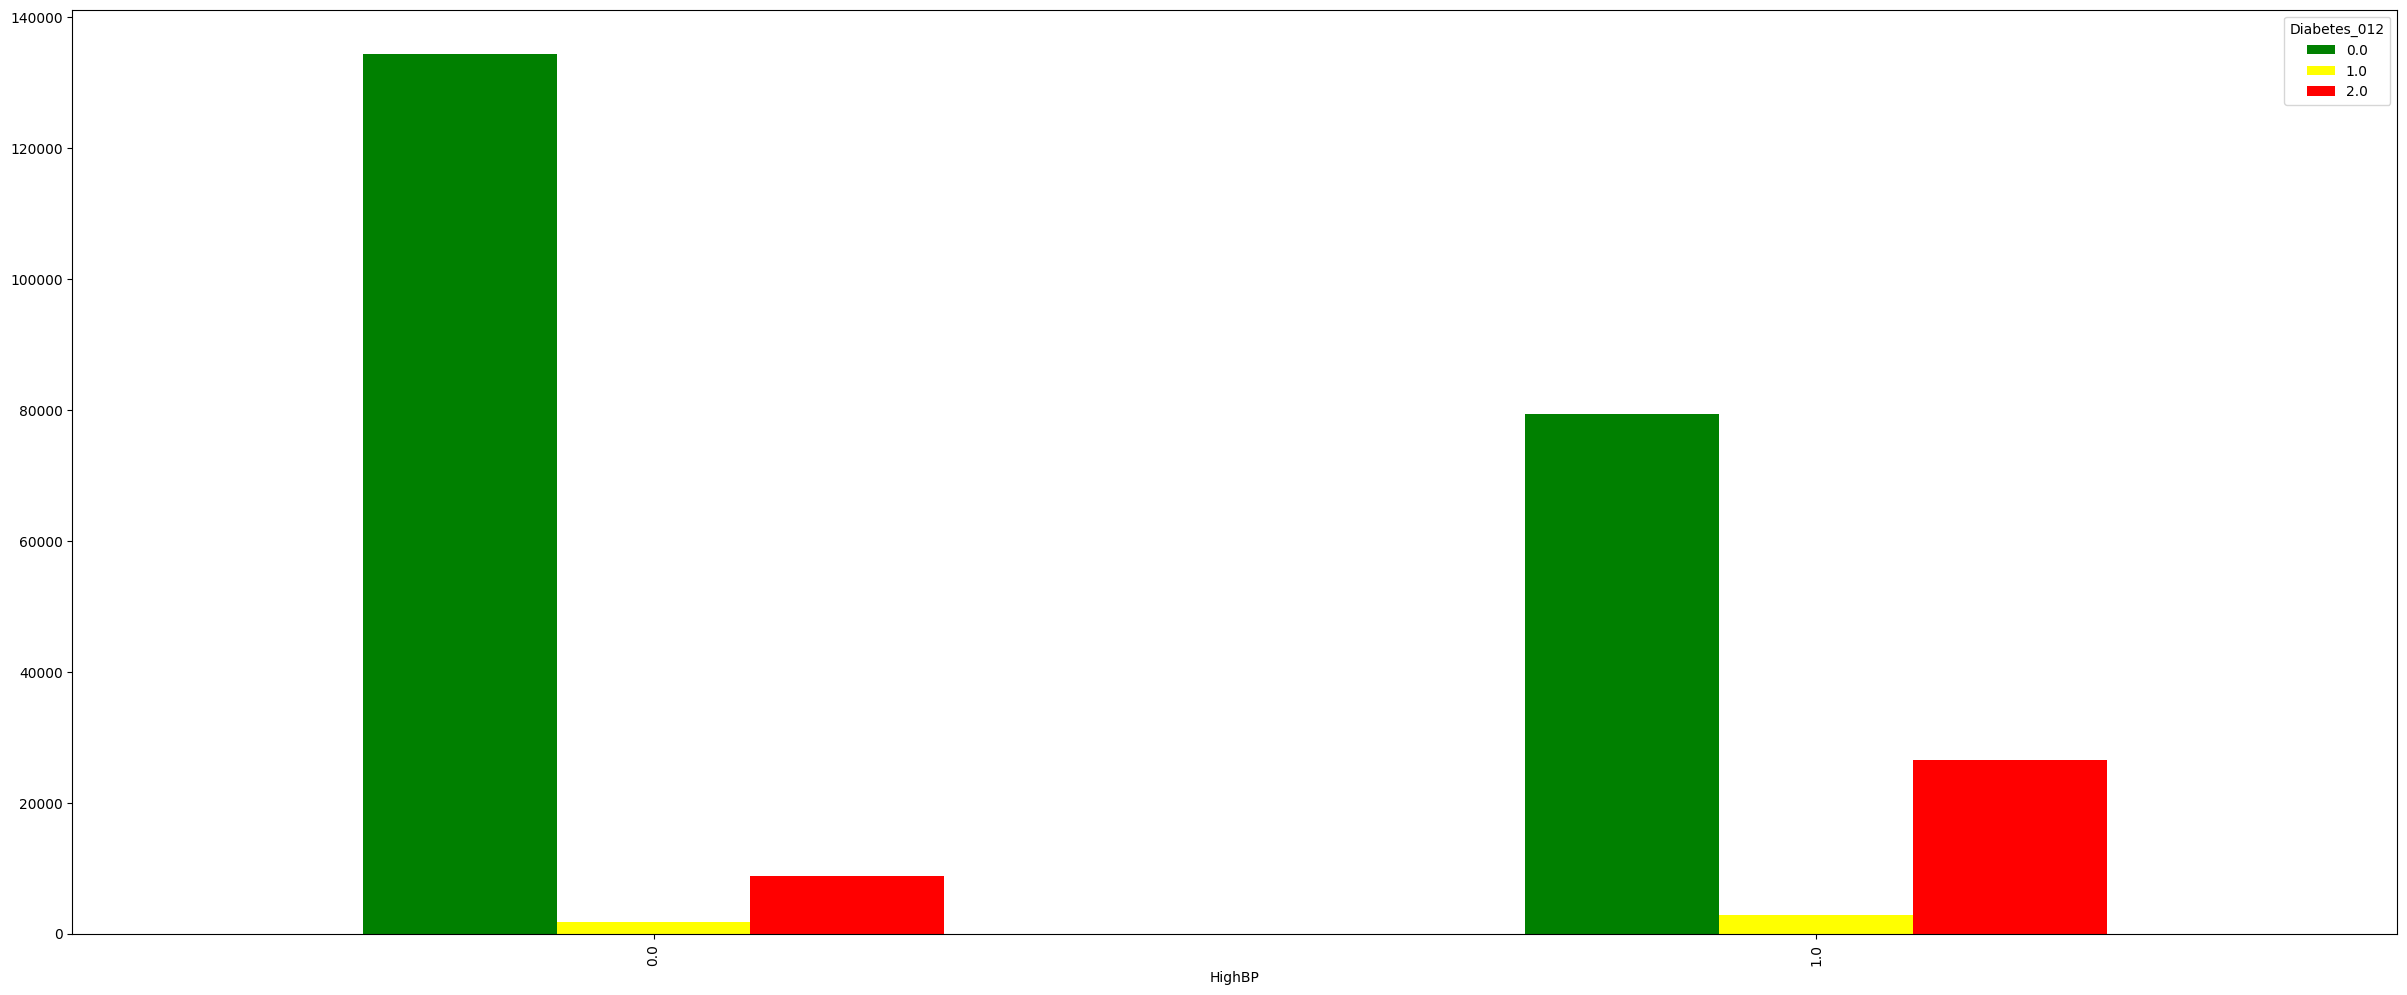

<Figure size 500x300 with 0 Axes>

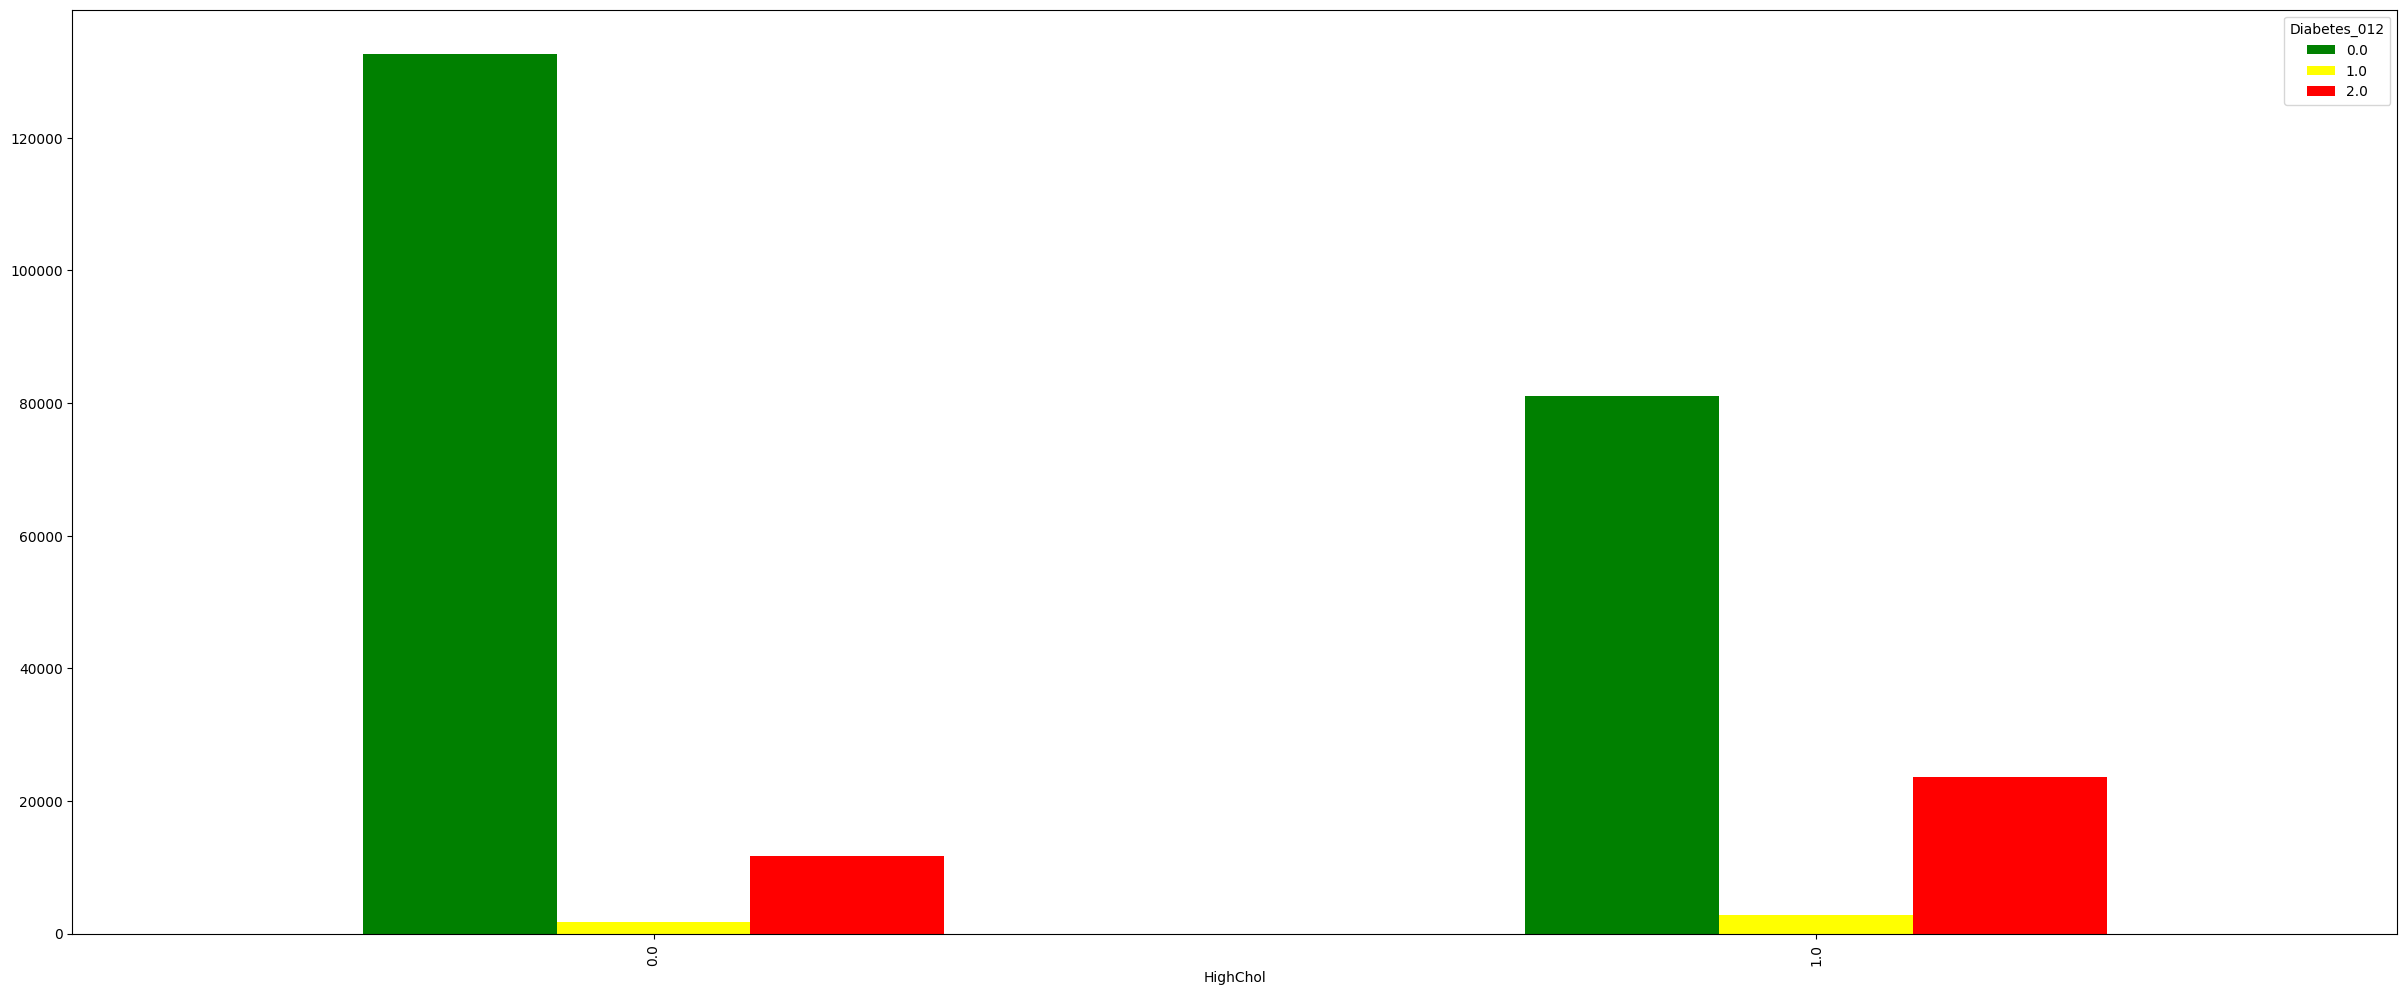

<Figure size 500x300 with 0 Axes>

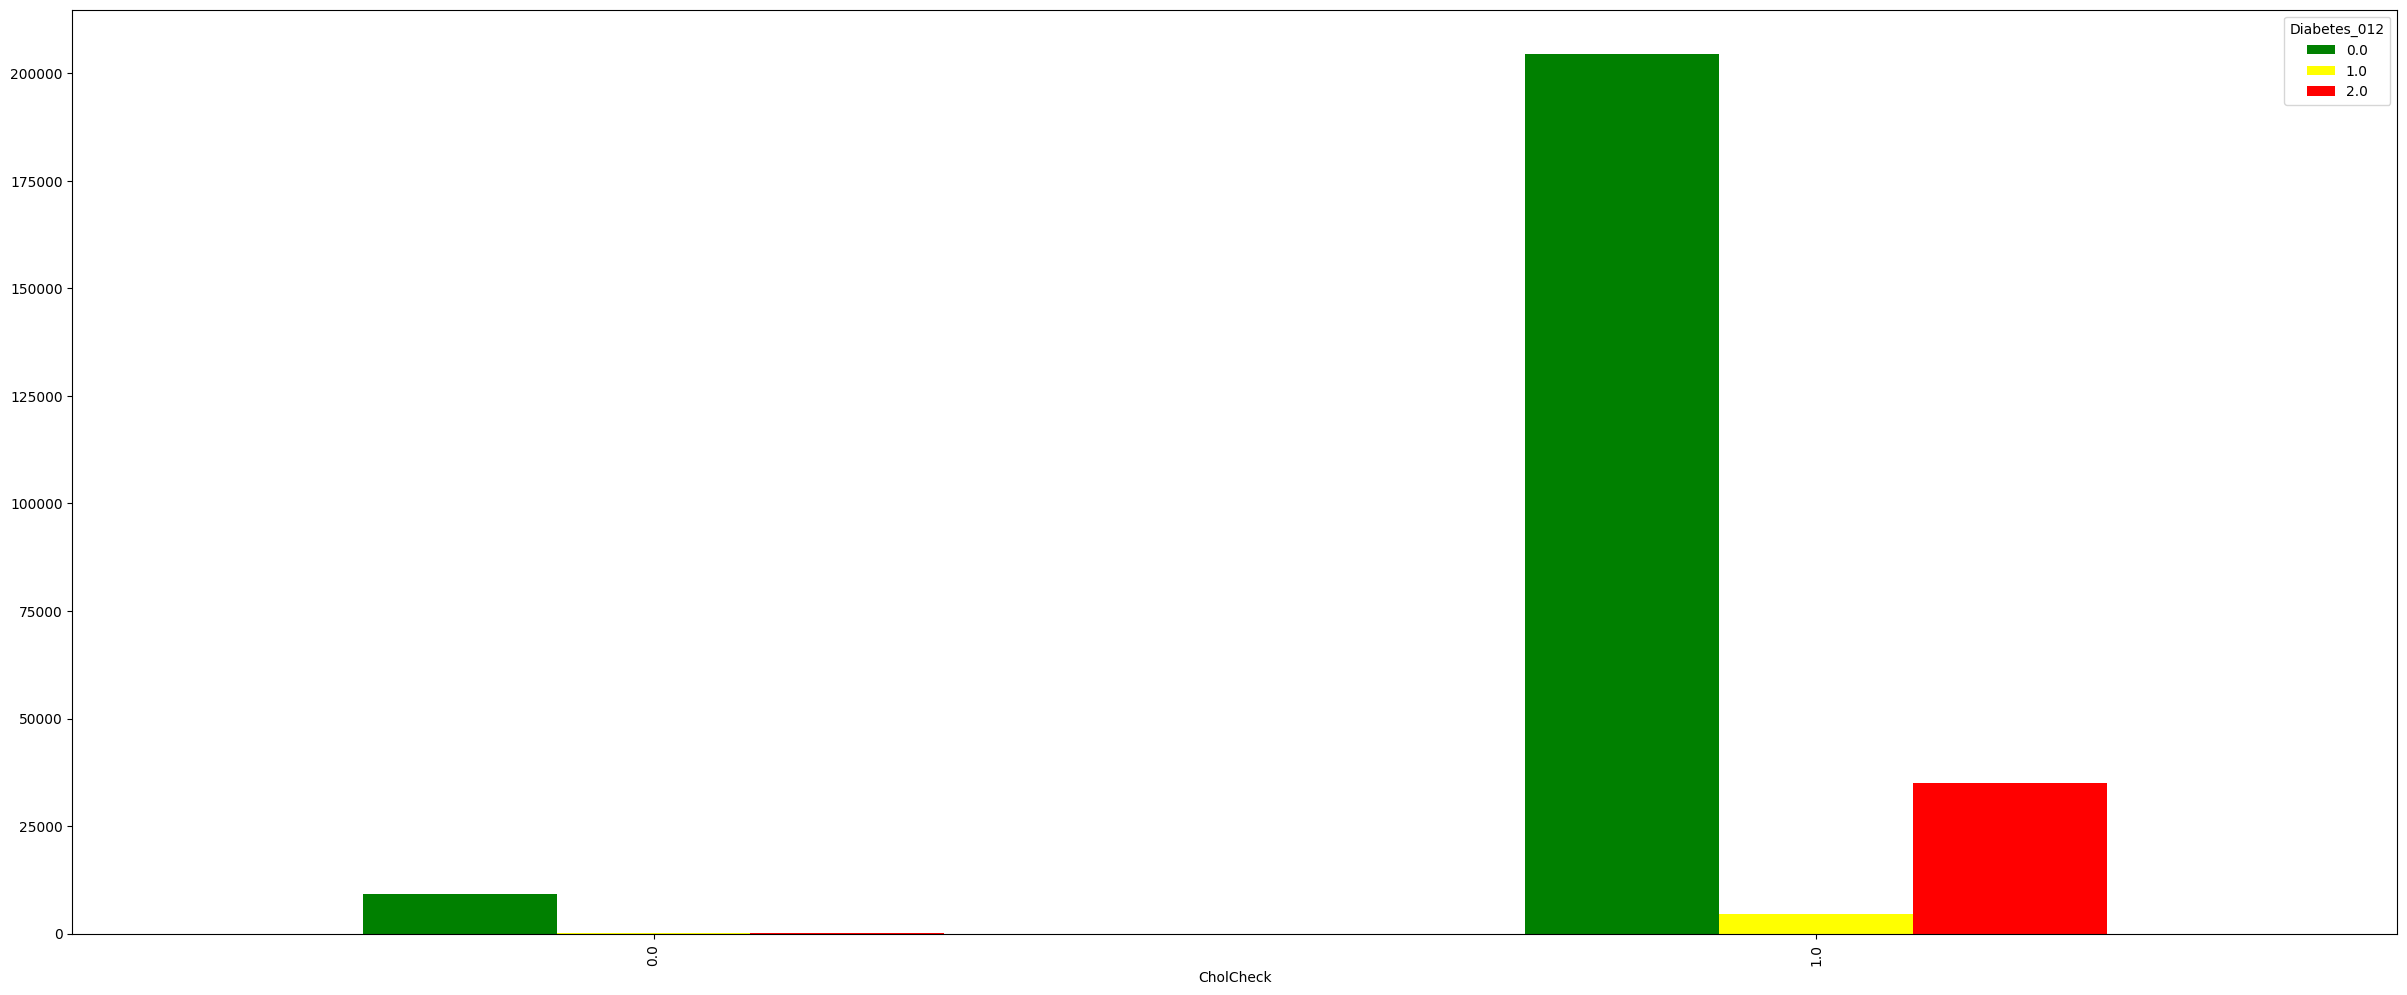

<Figure size 500x300 with 0 Axes>

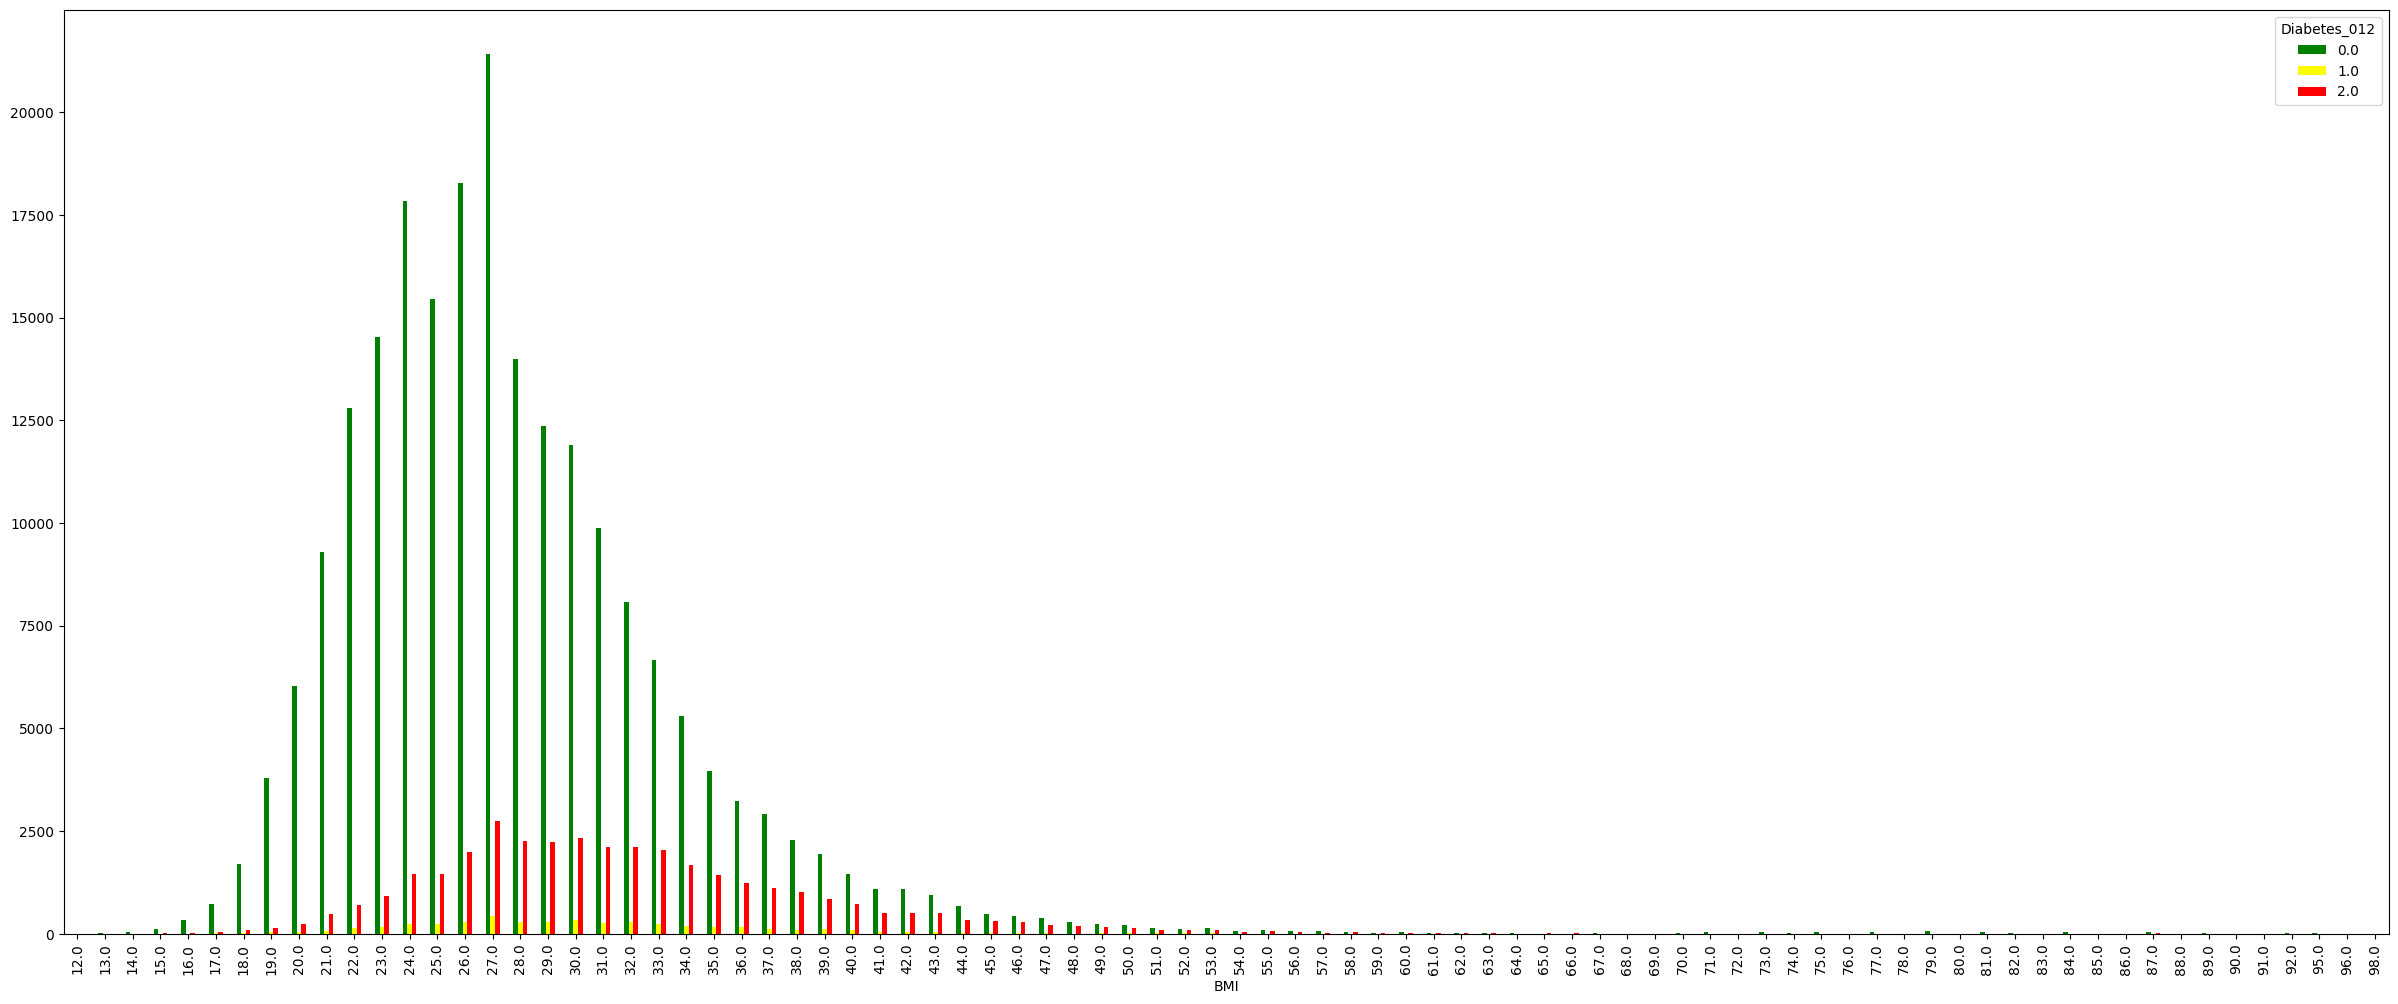

<Figure size 500x300 with 0 Axes>

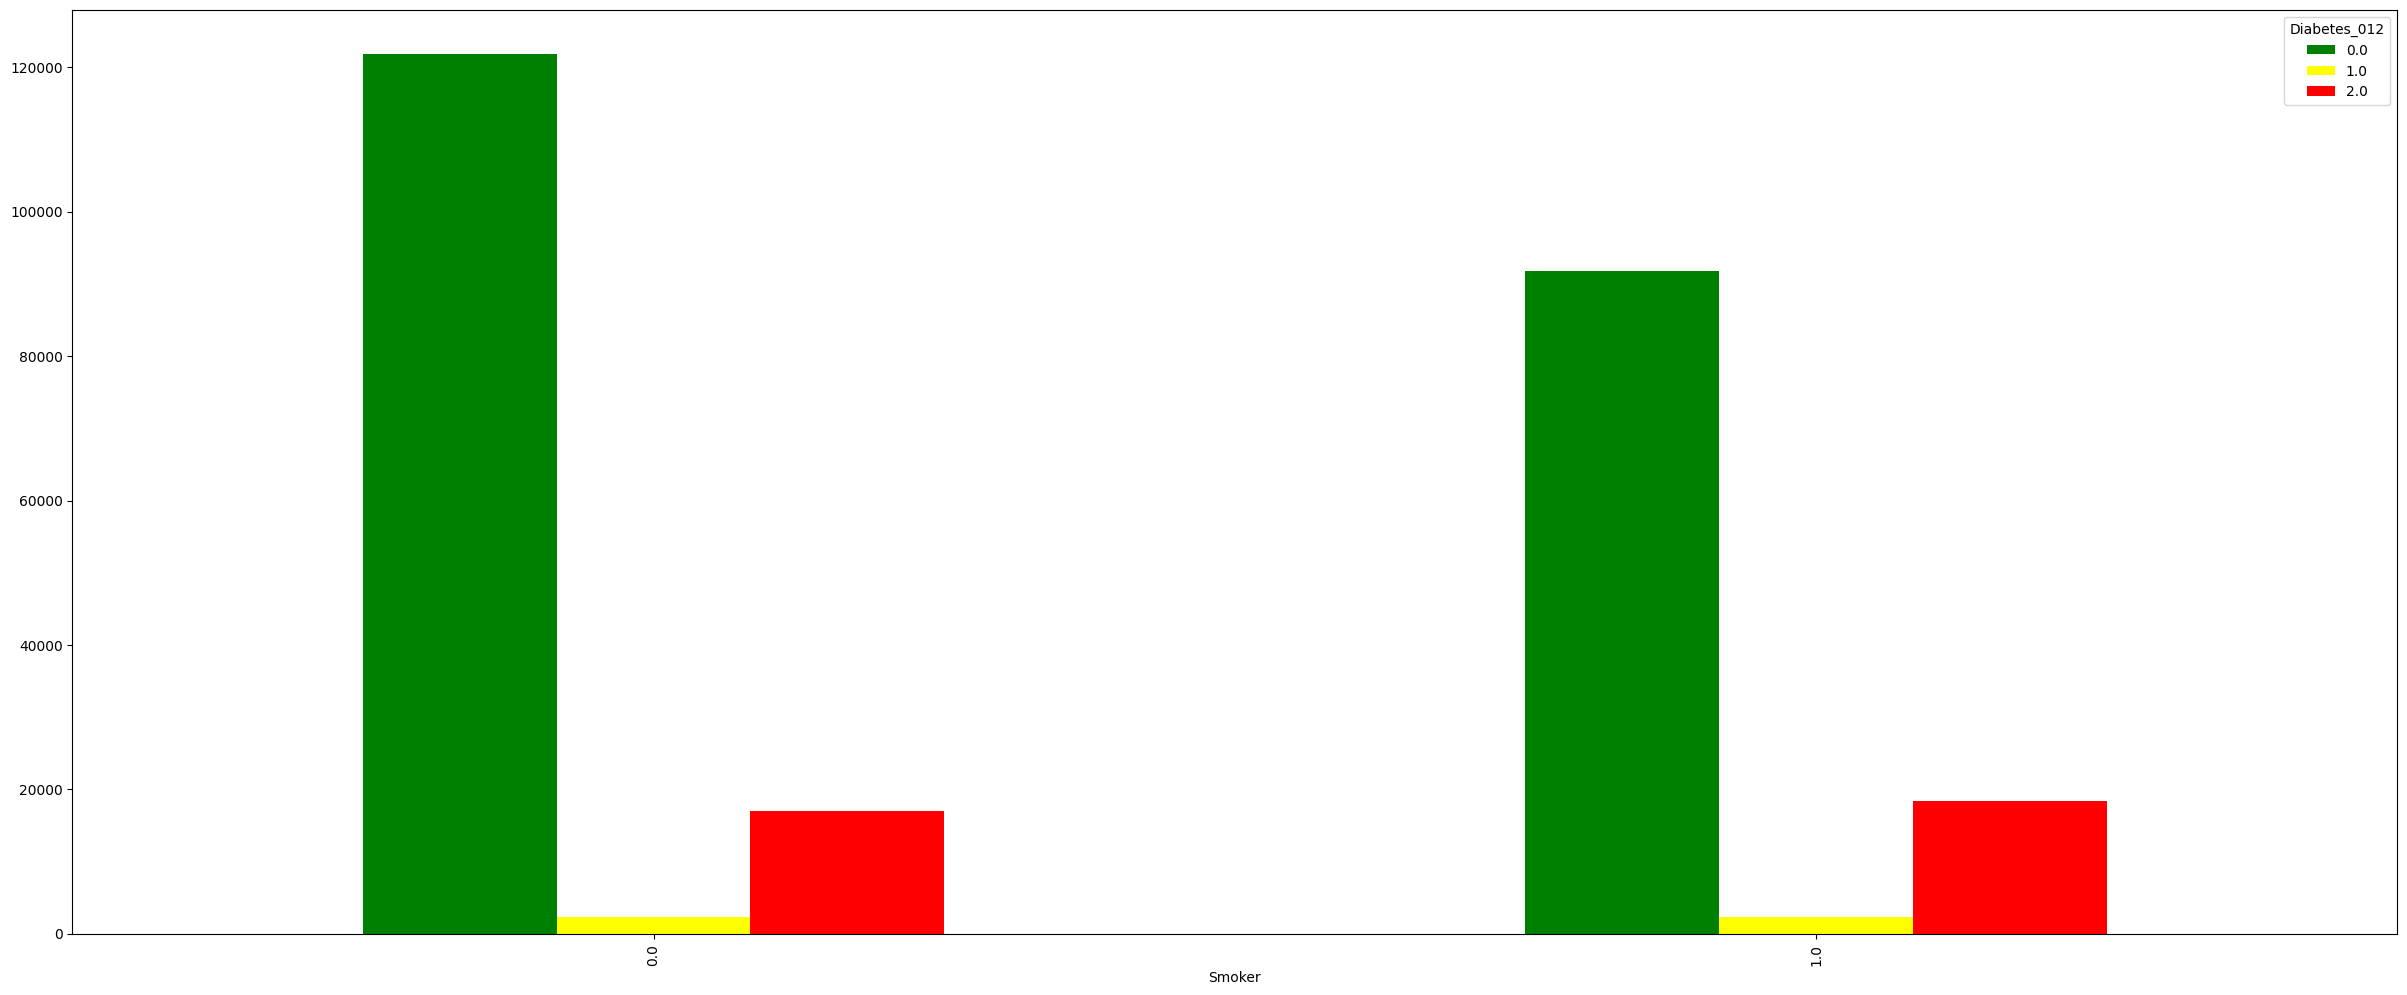

<Figure size 500x300 with 0 Axes>

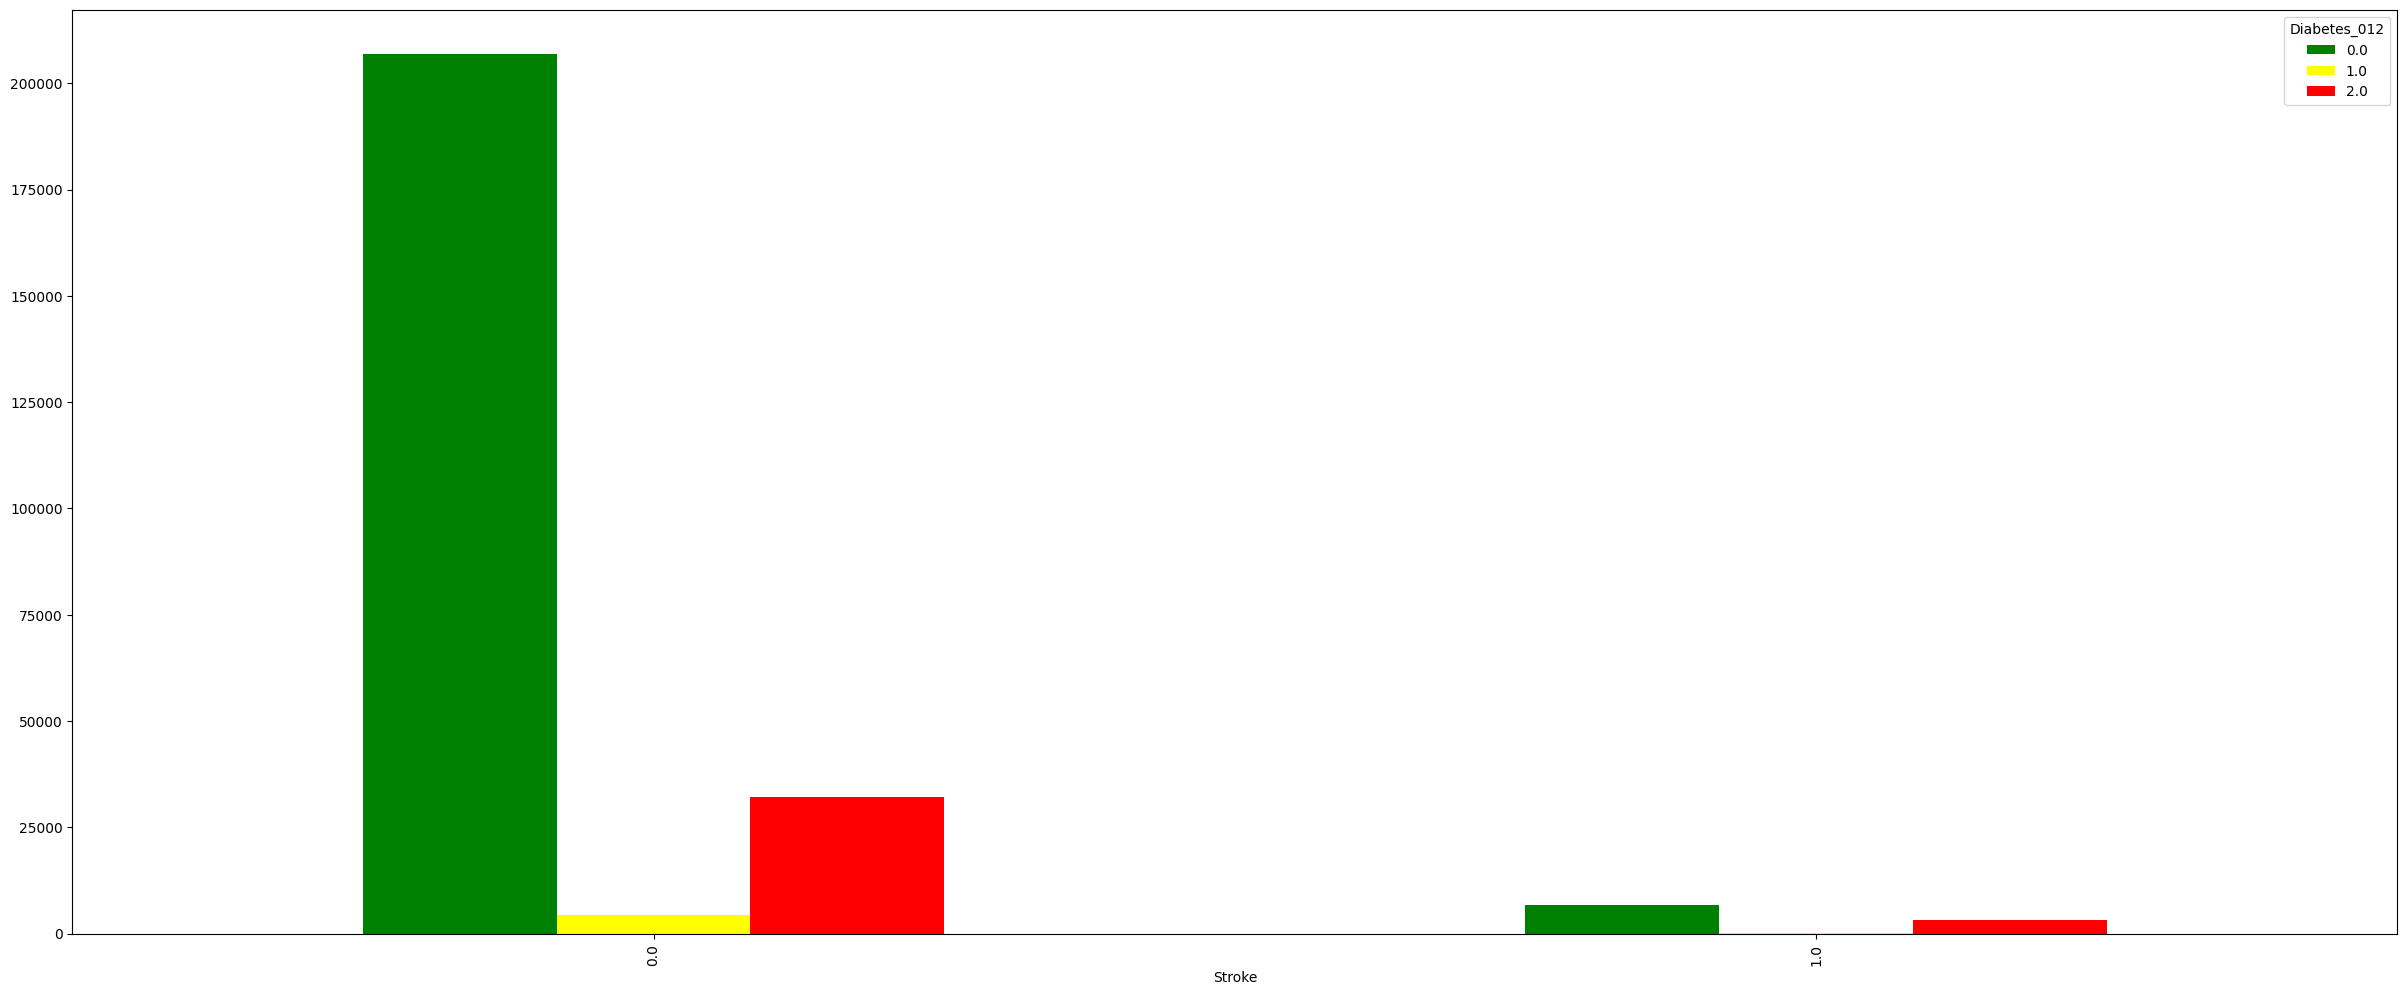

<Figure size 500x300 with 0 Axes>

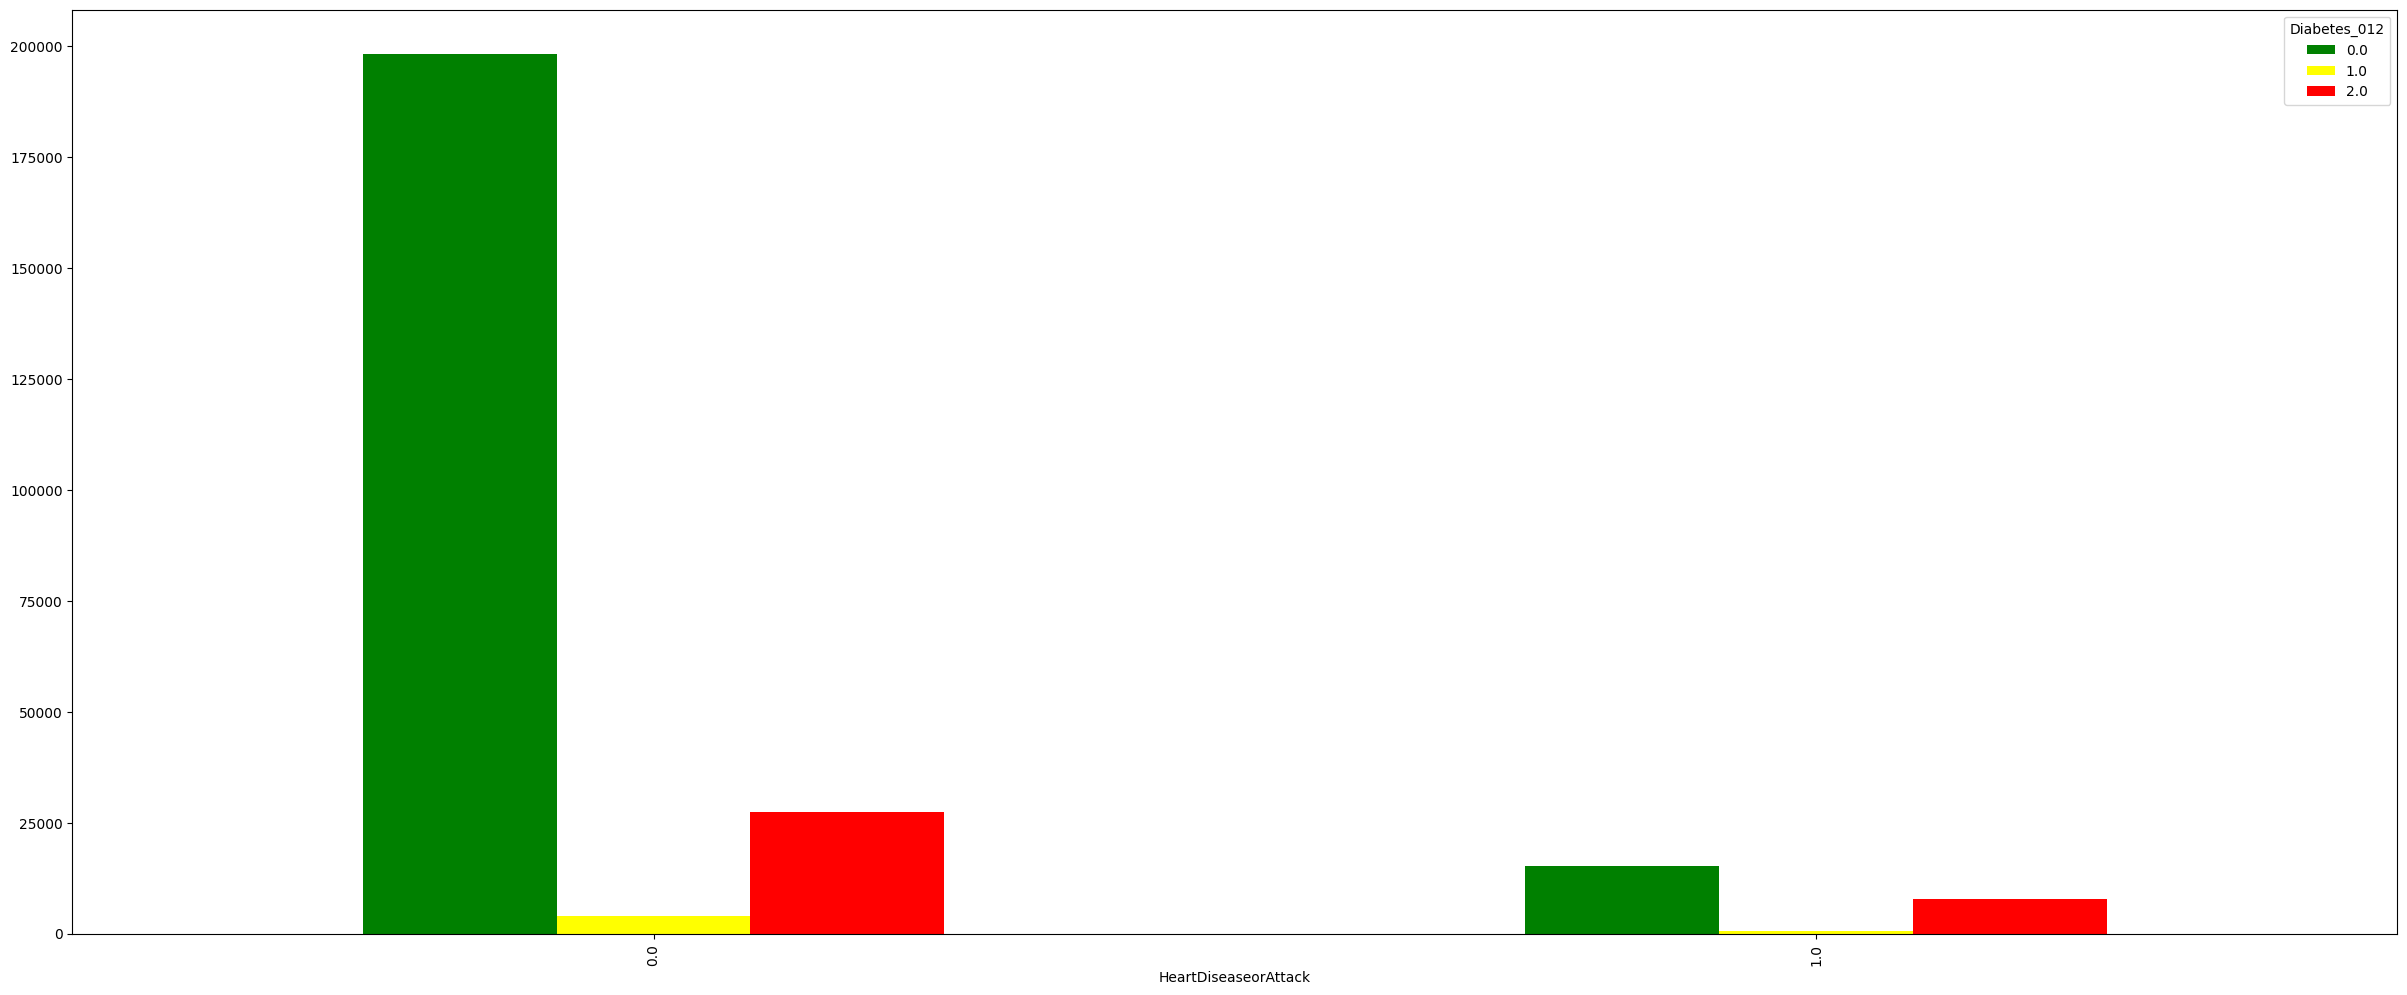

<Figure size 500x300 with 0 Axes>

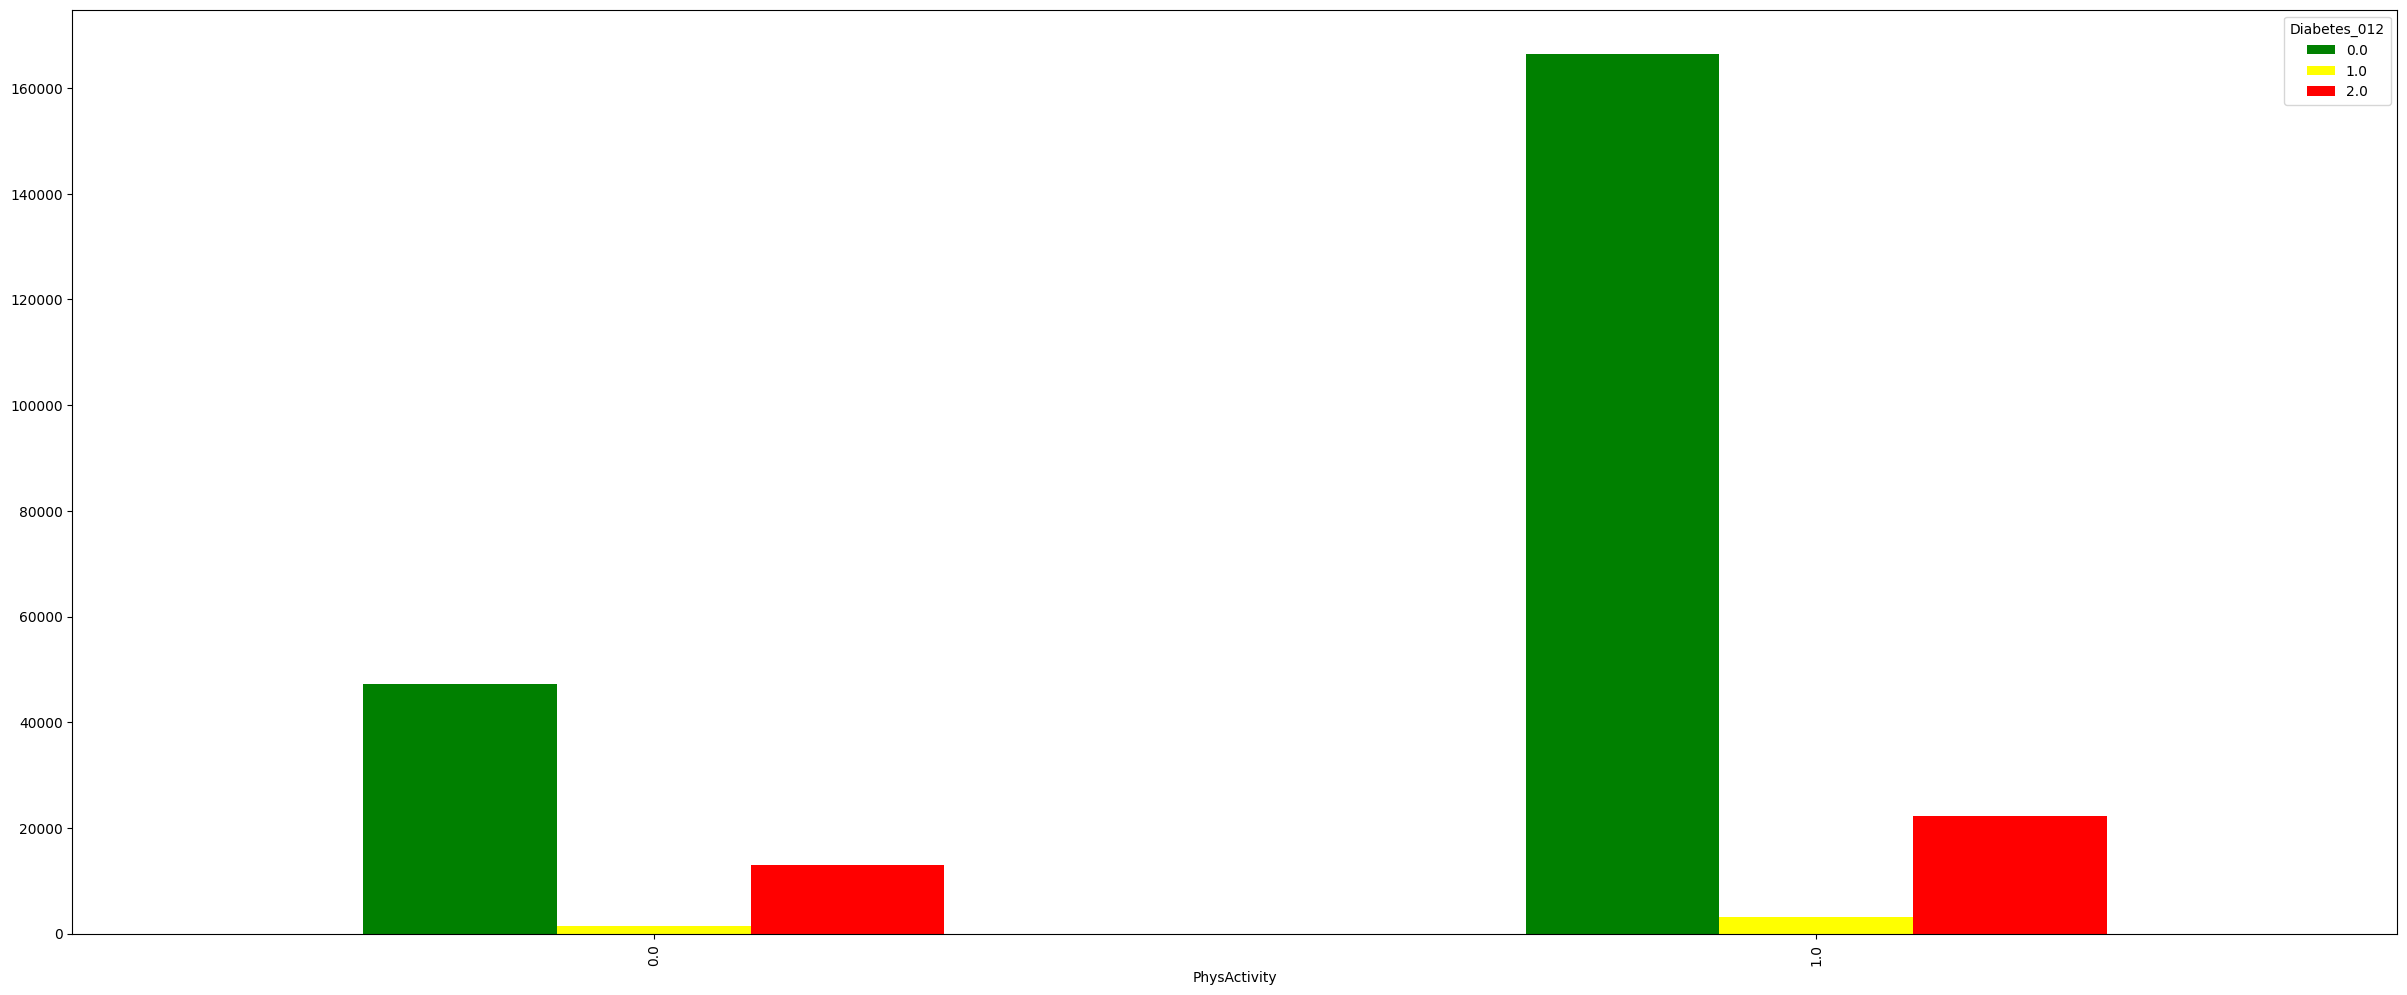

<Figure size 500x300 with 0 Axes>

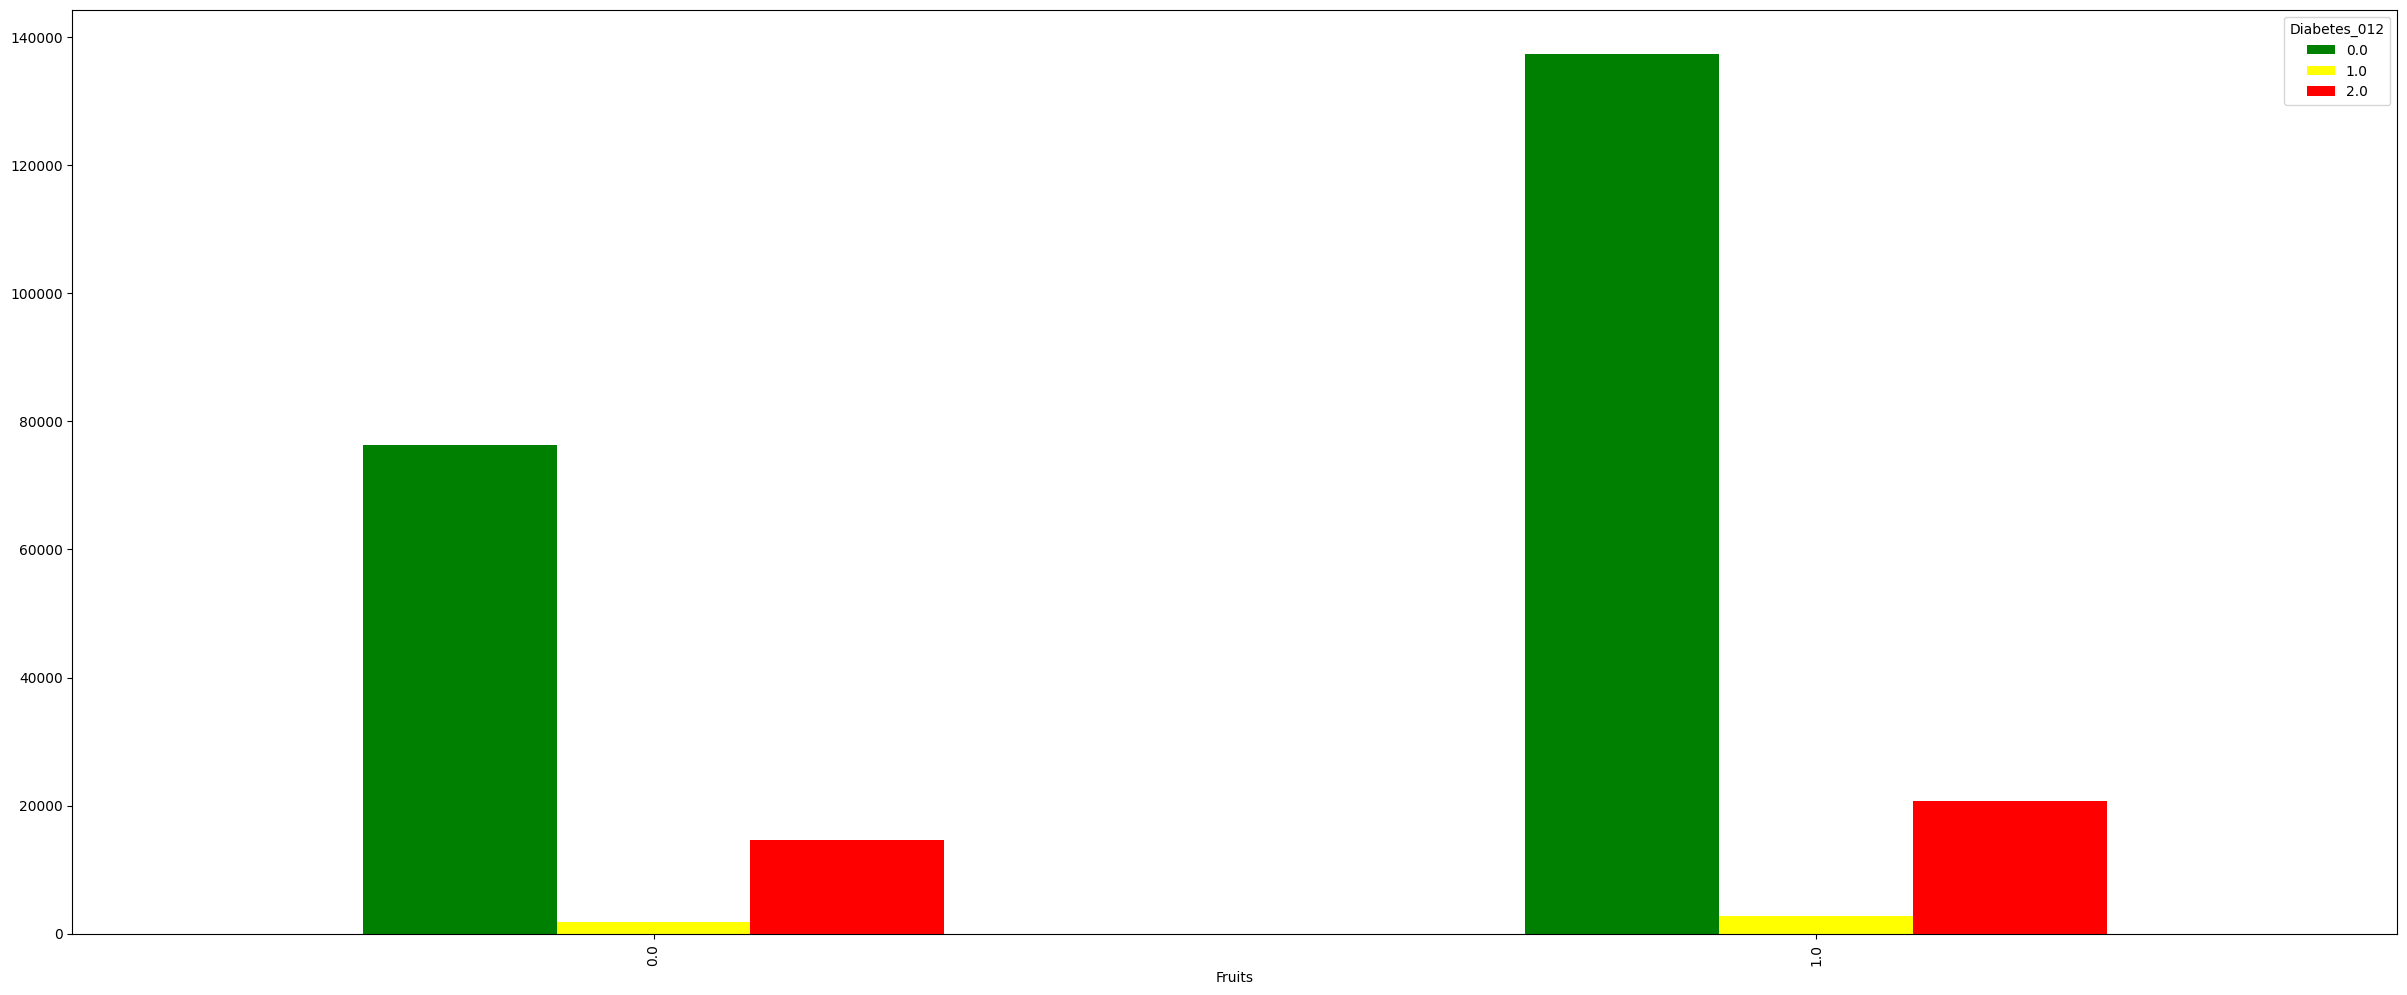

<Figure size 500x300 with 0 Axes>

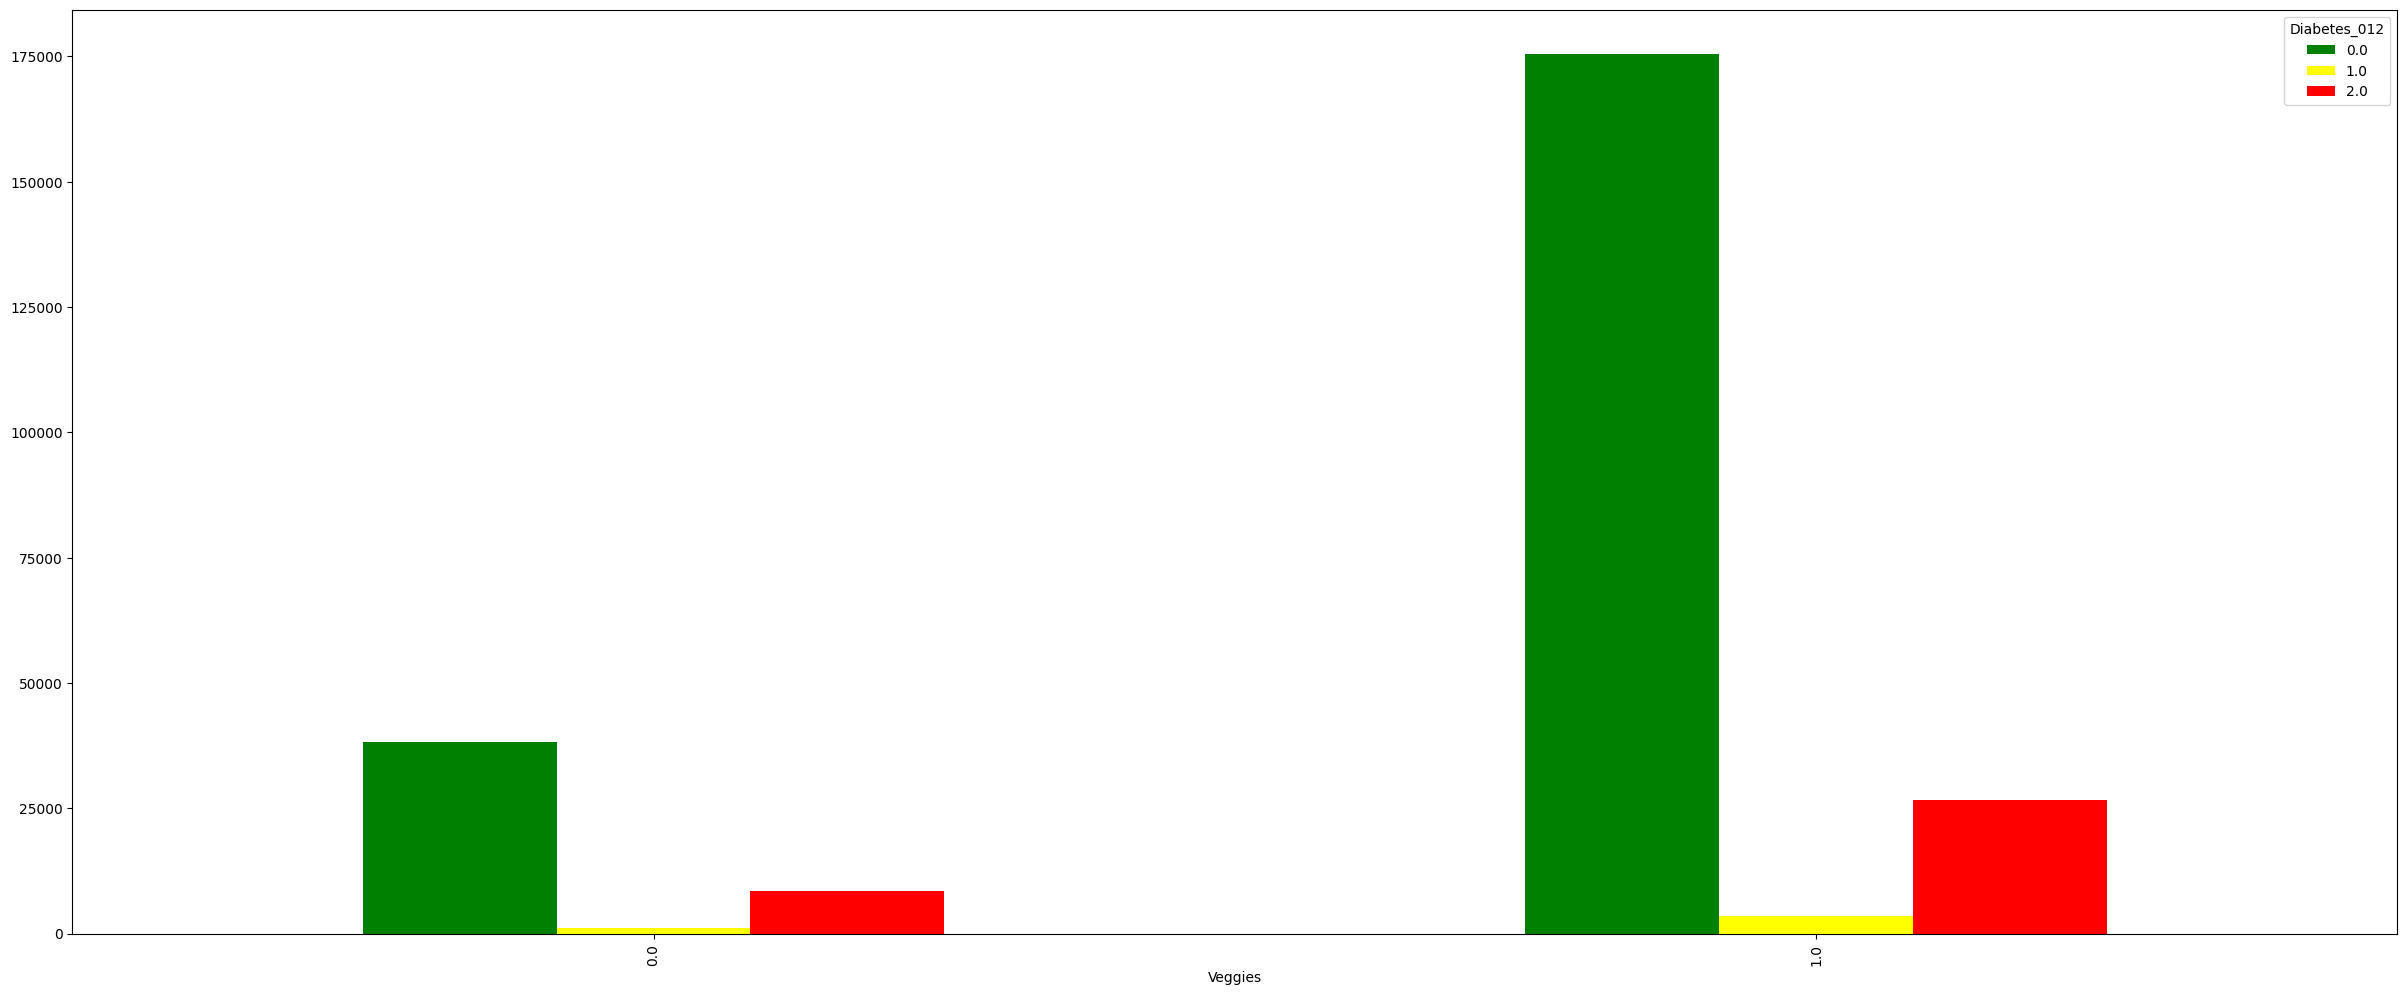

<Figure size 500x300 with 0 Axes>

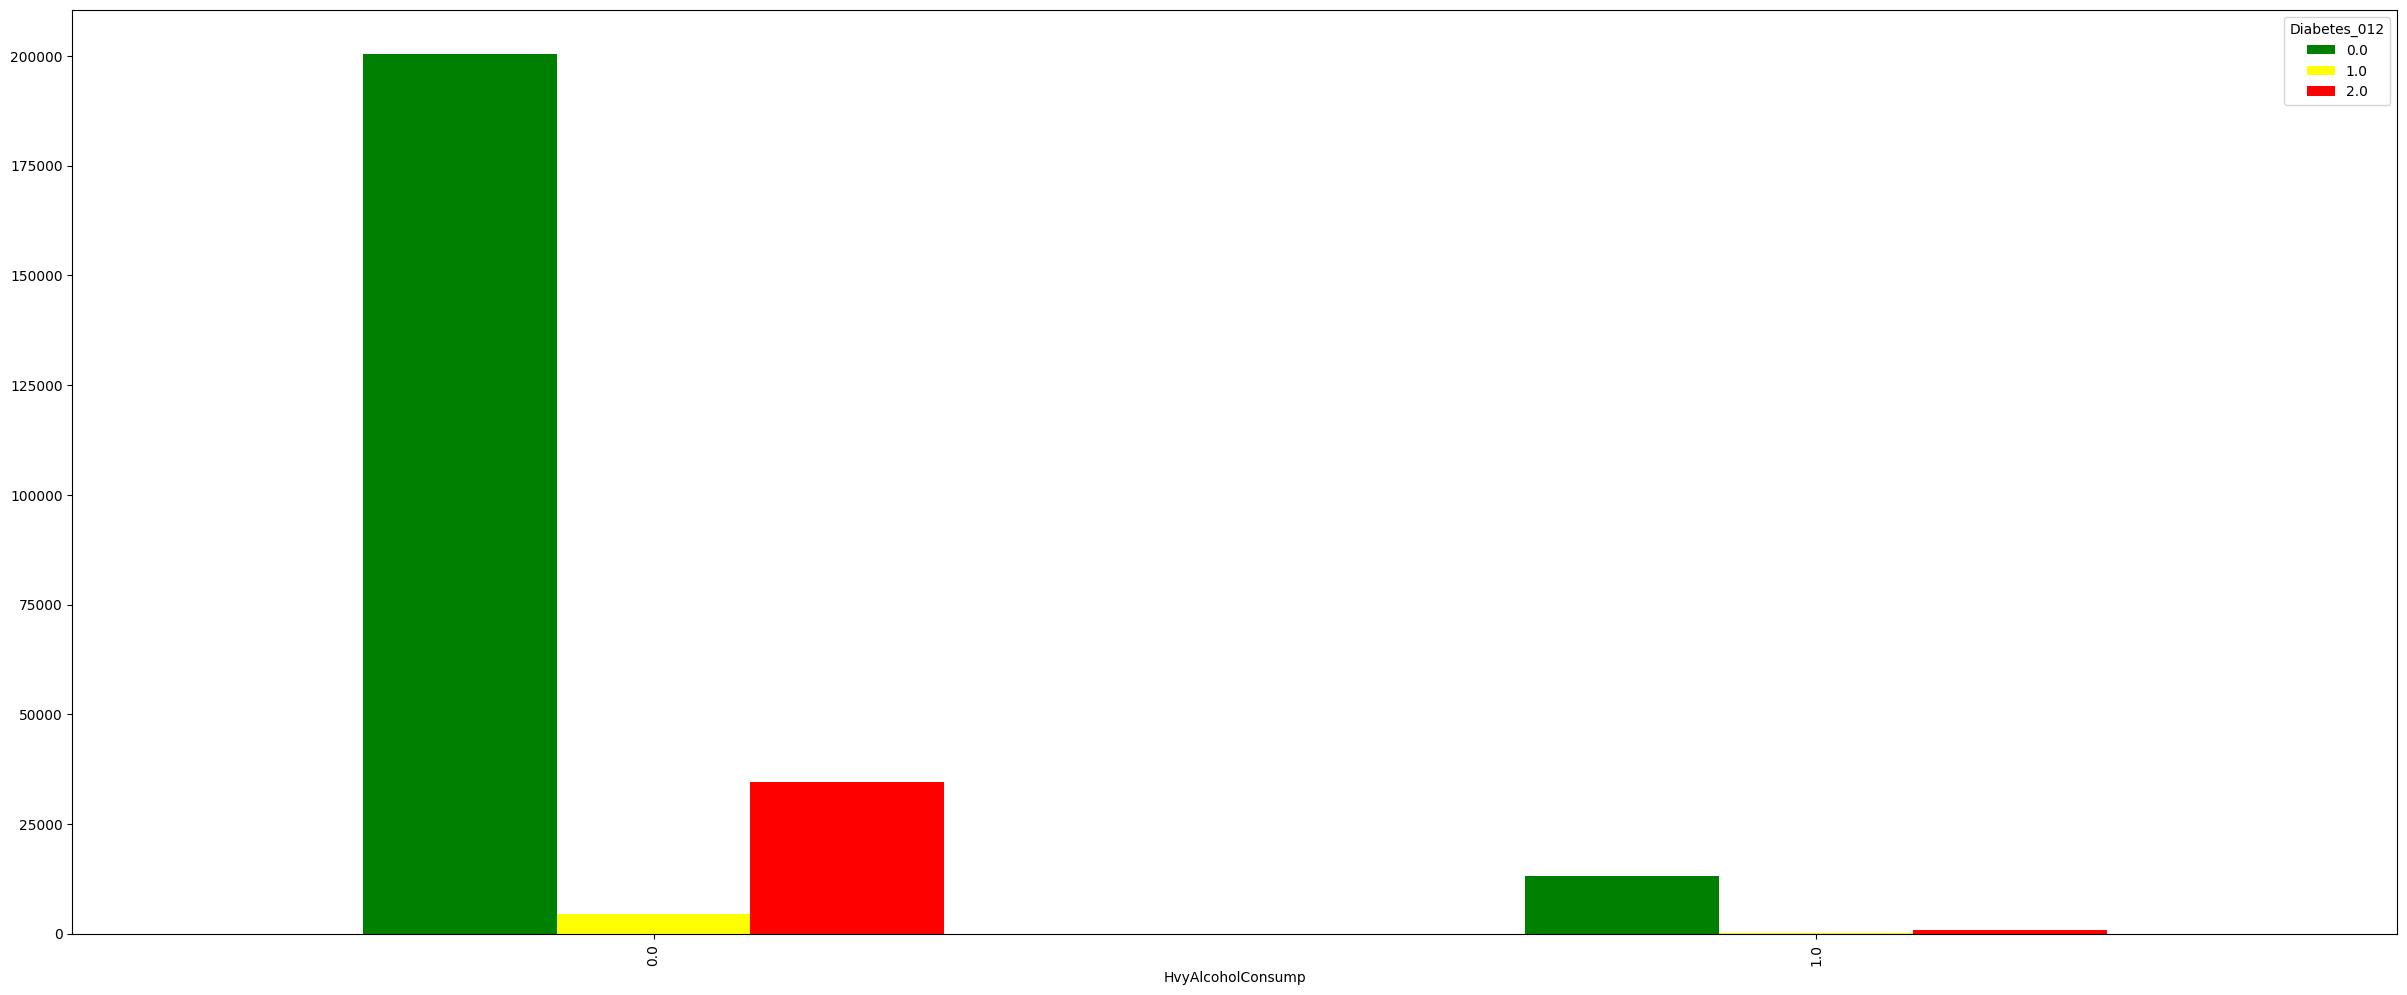

<Figure size 500x300 with 0 Axes>

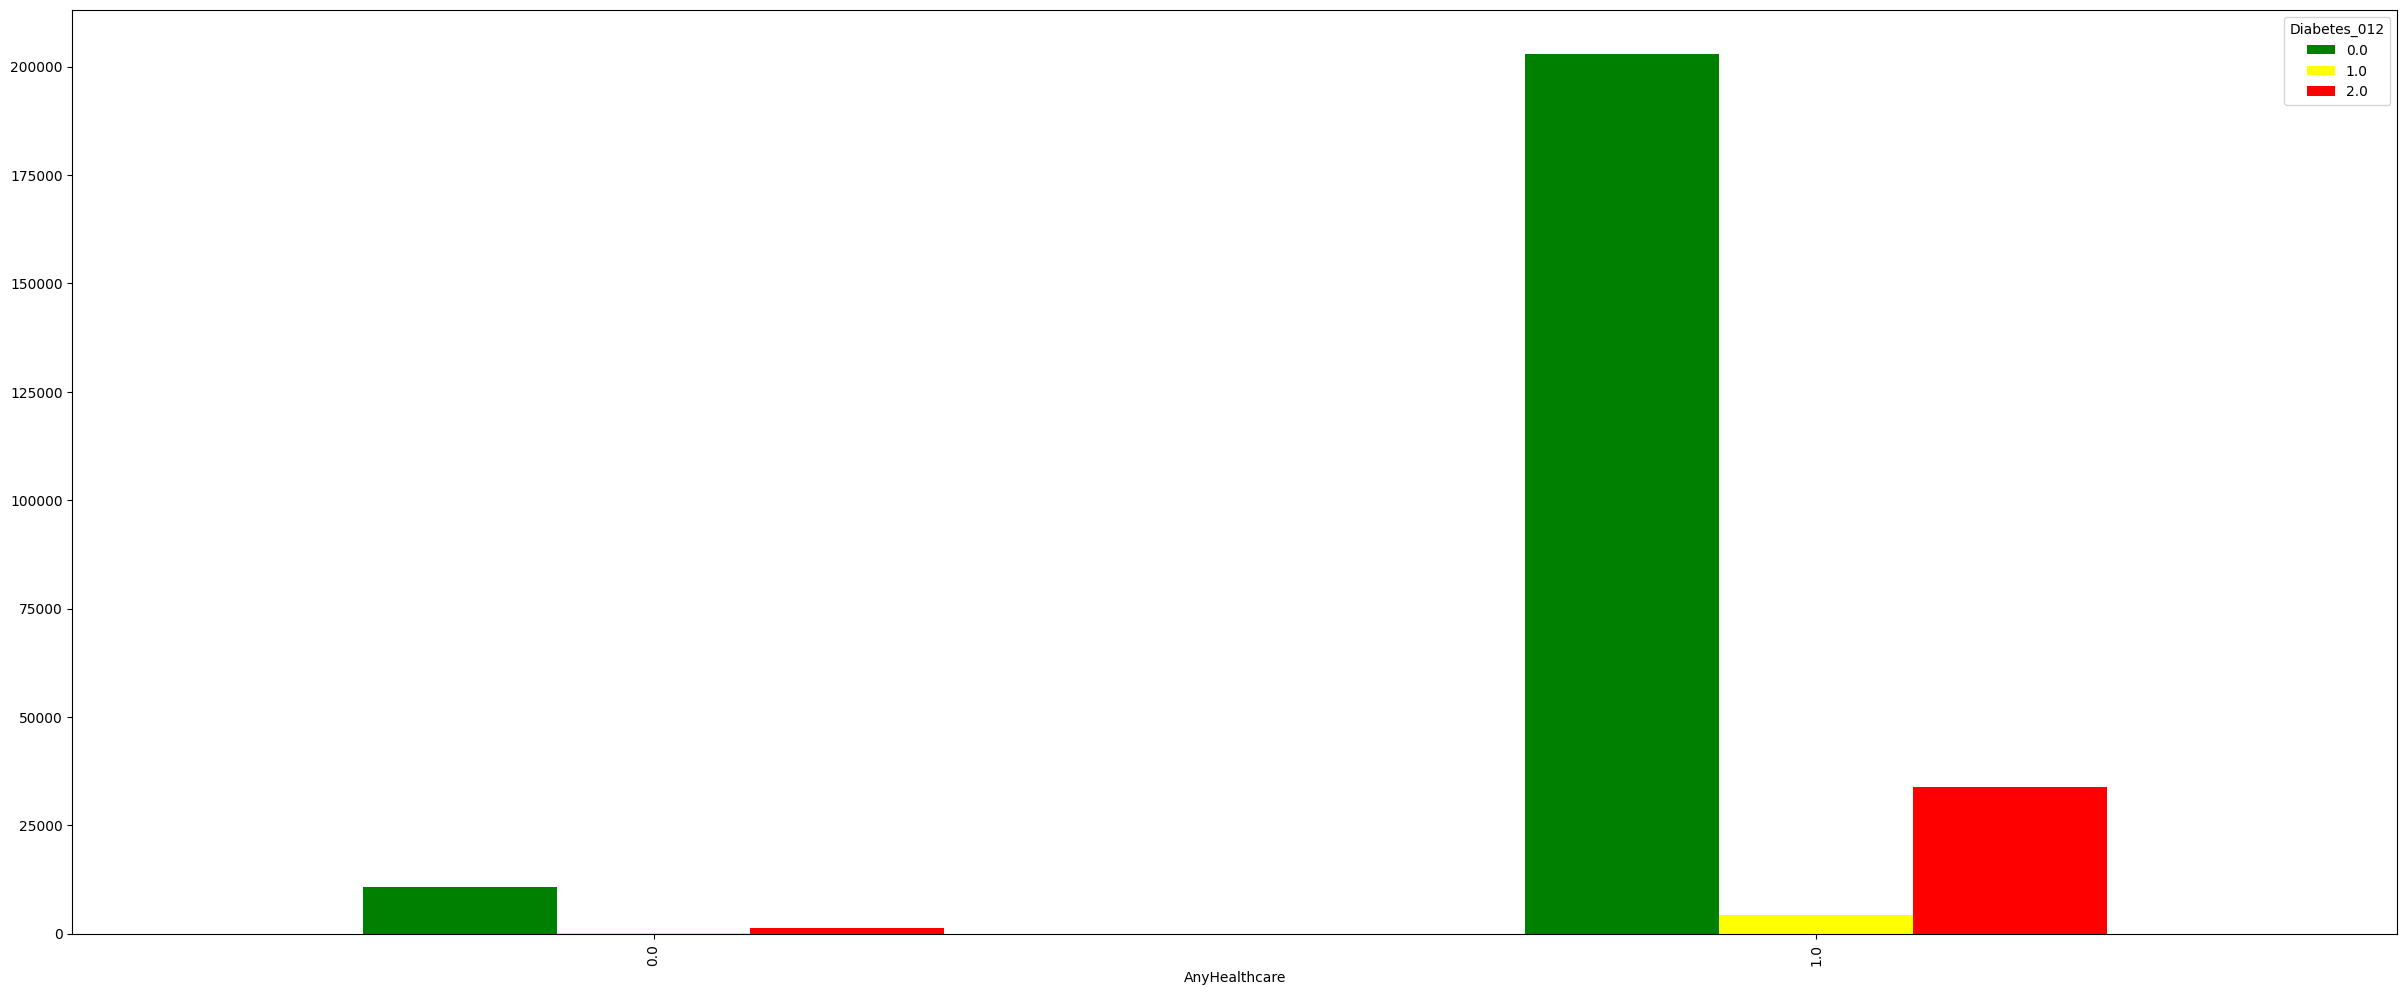

<Figure size 500x300 with 0 Axes>

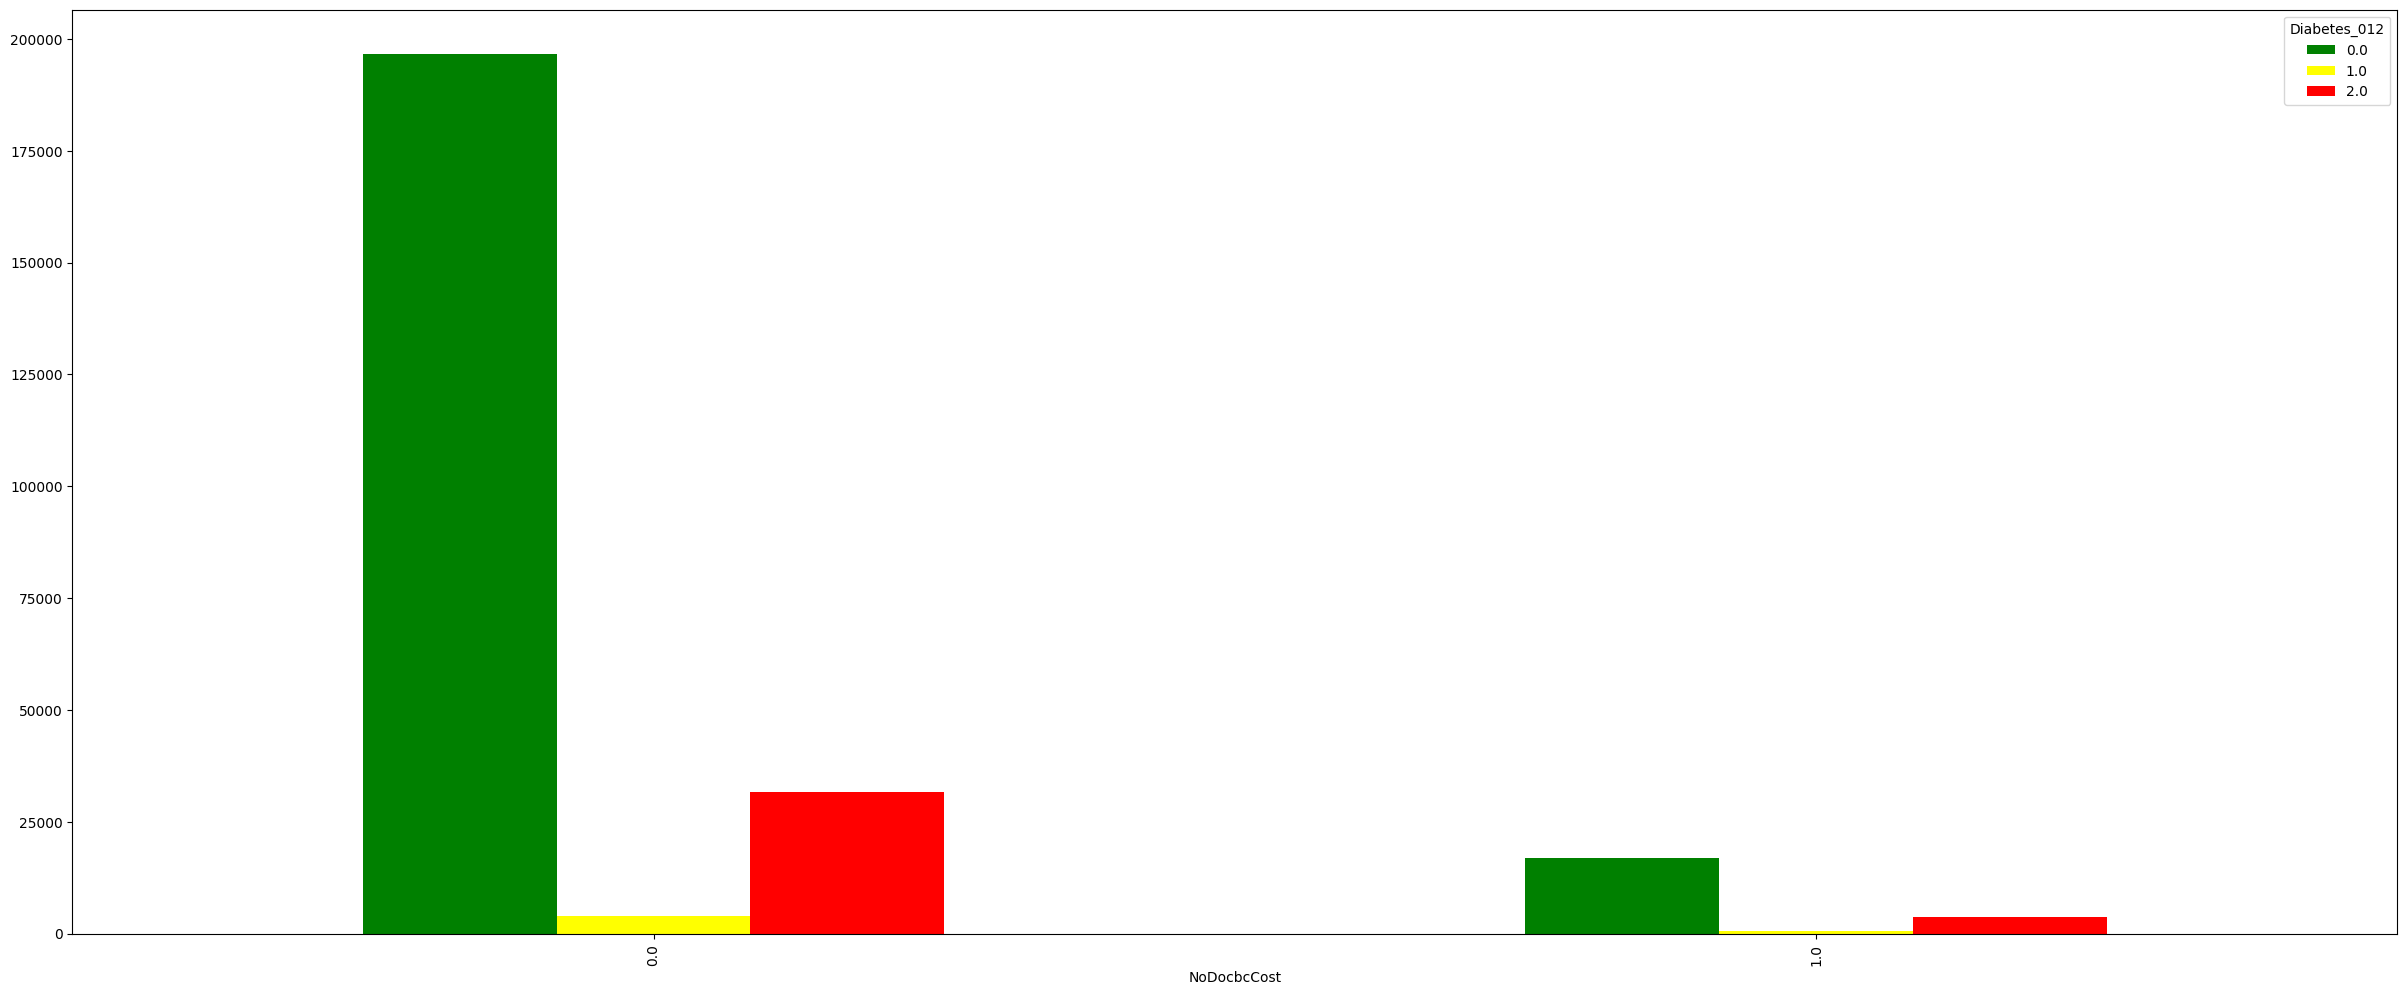

<Figure size 500x300 with 0 Axes>

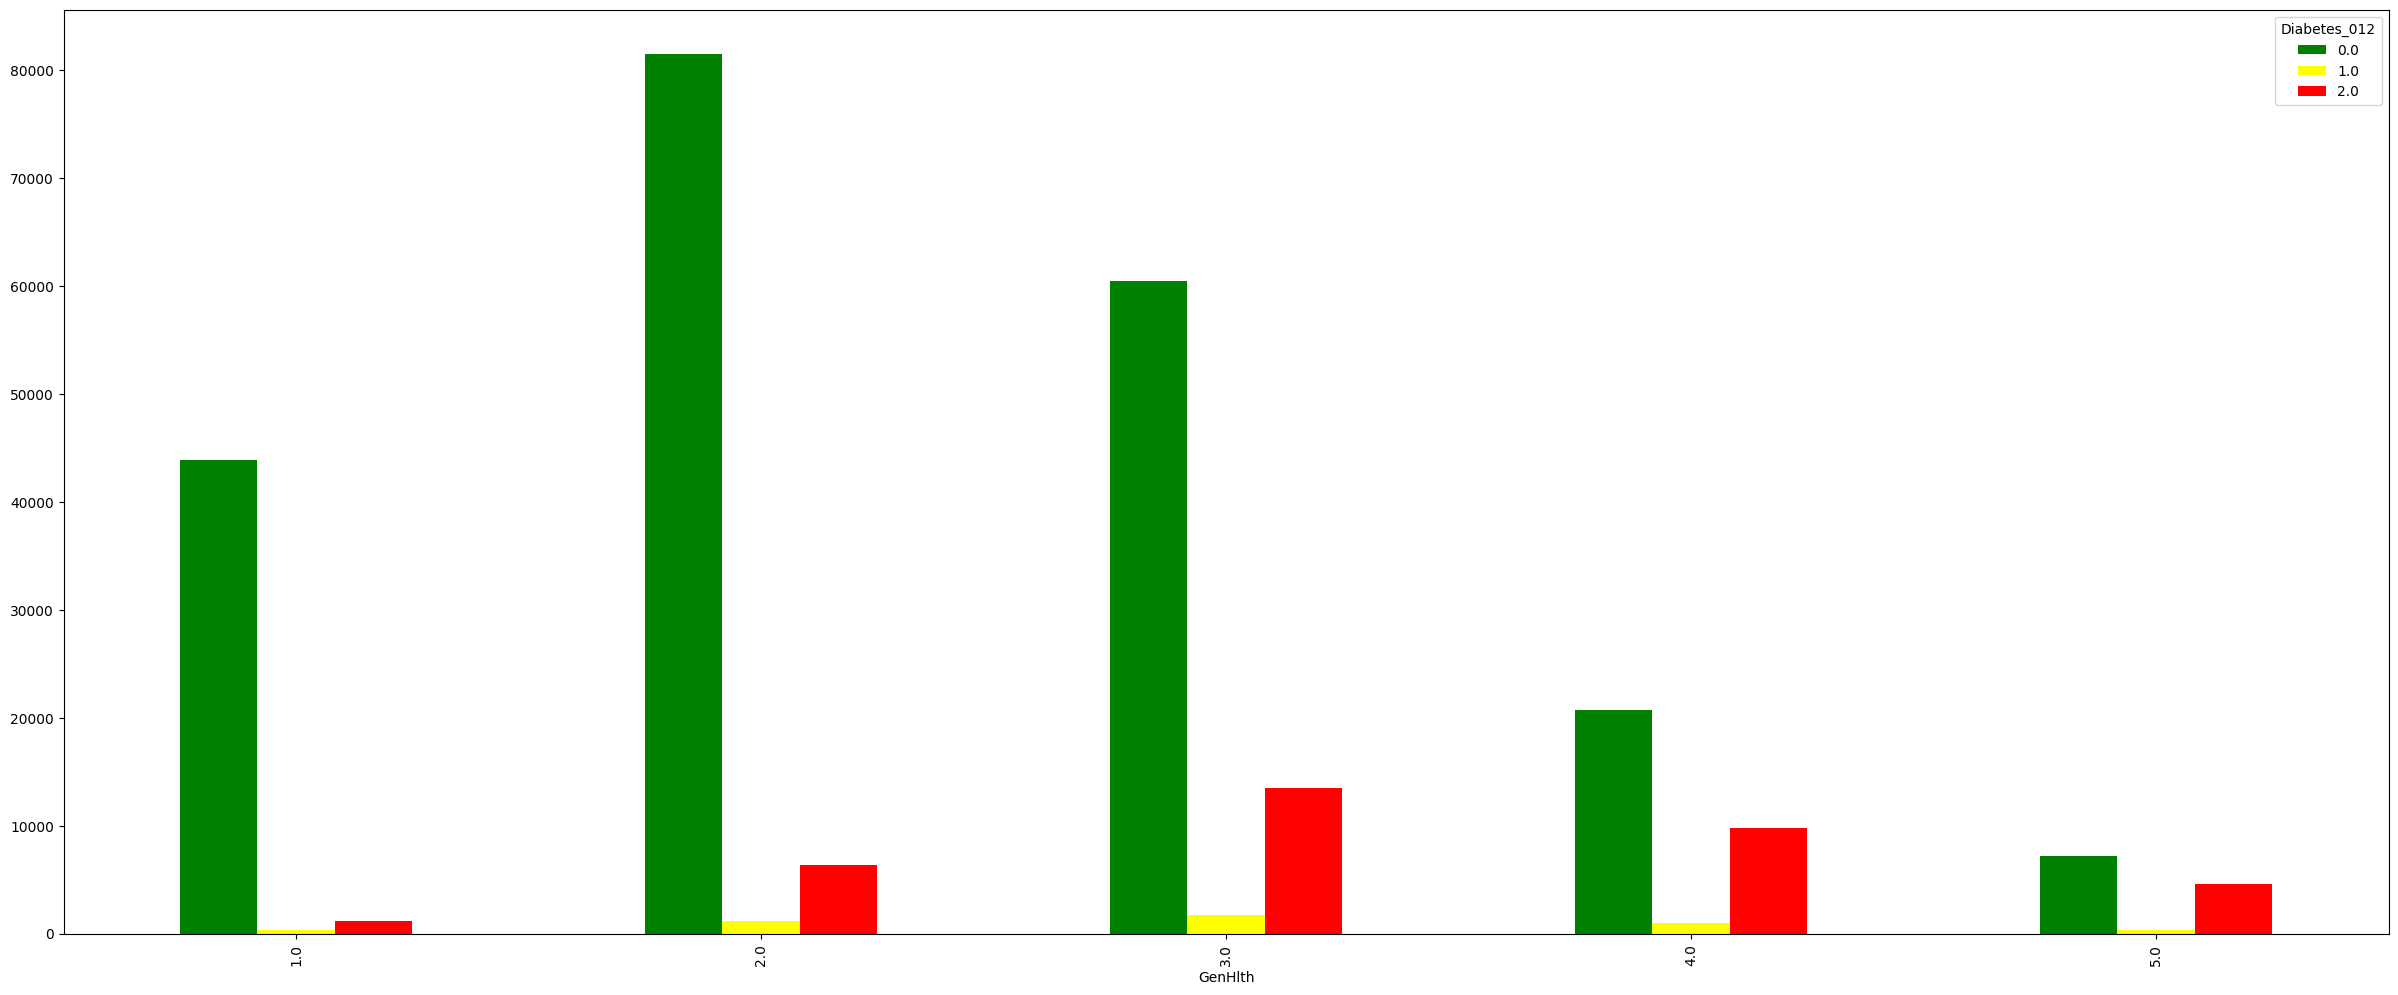

<Figure size 500x300 with 0 Axes>

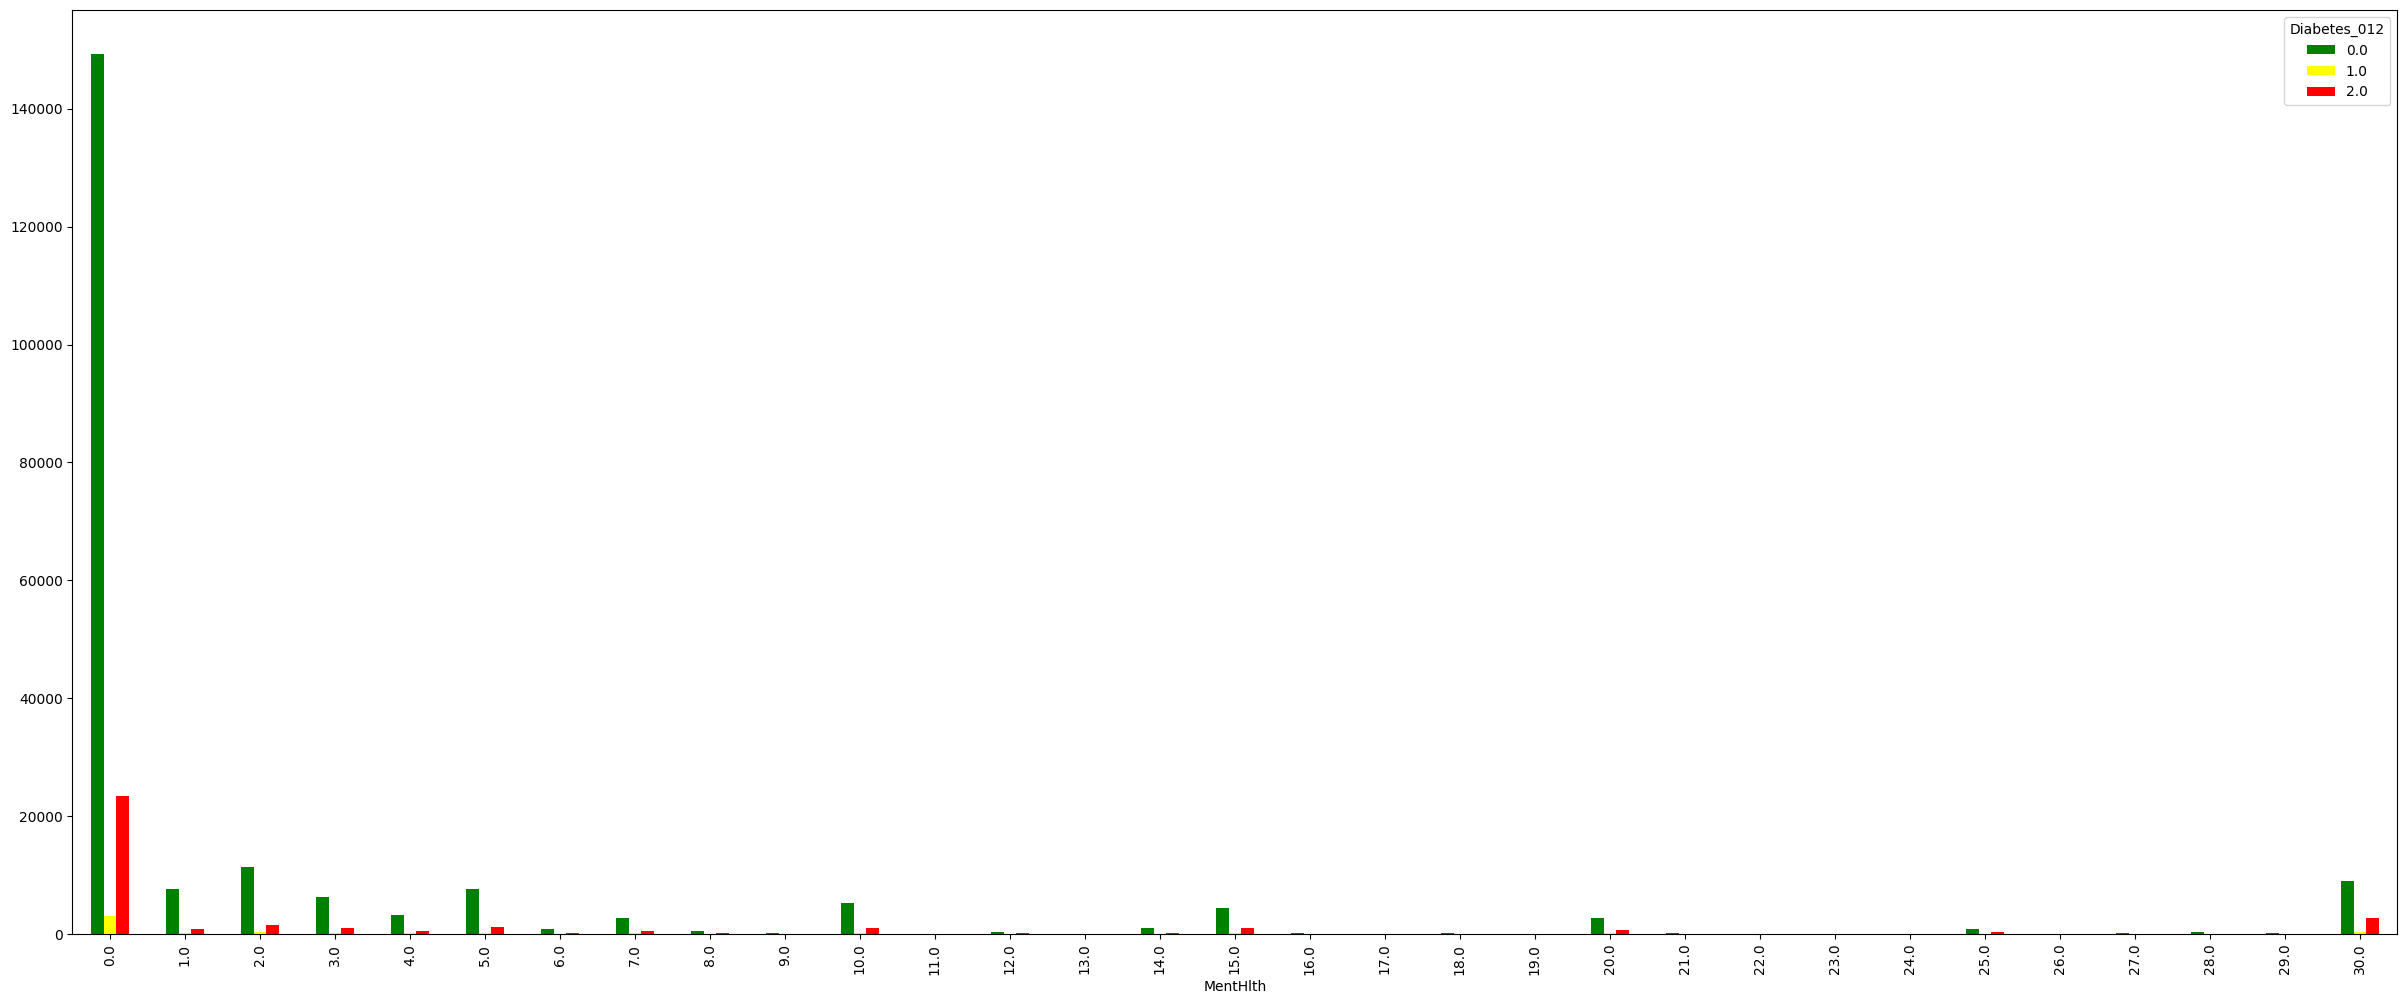

<Figure size 500x300 with 0 Axes>

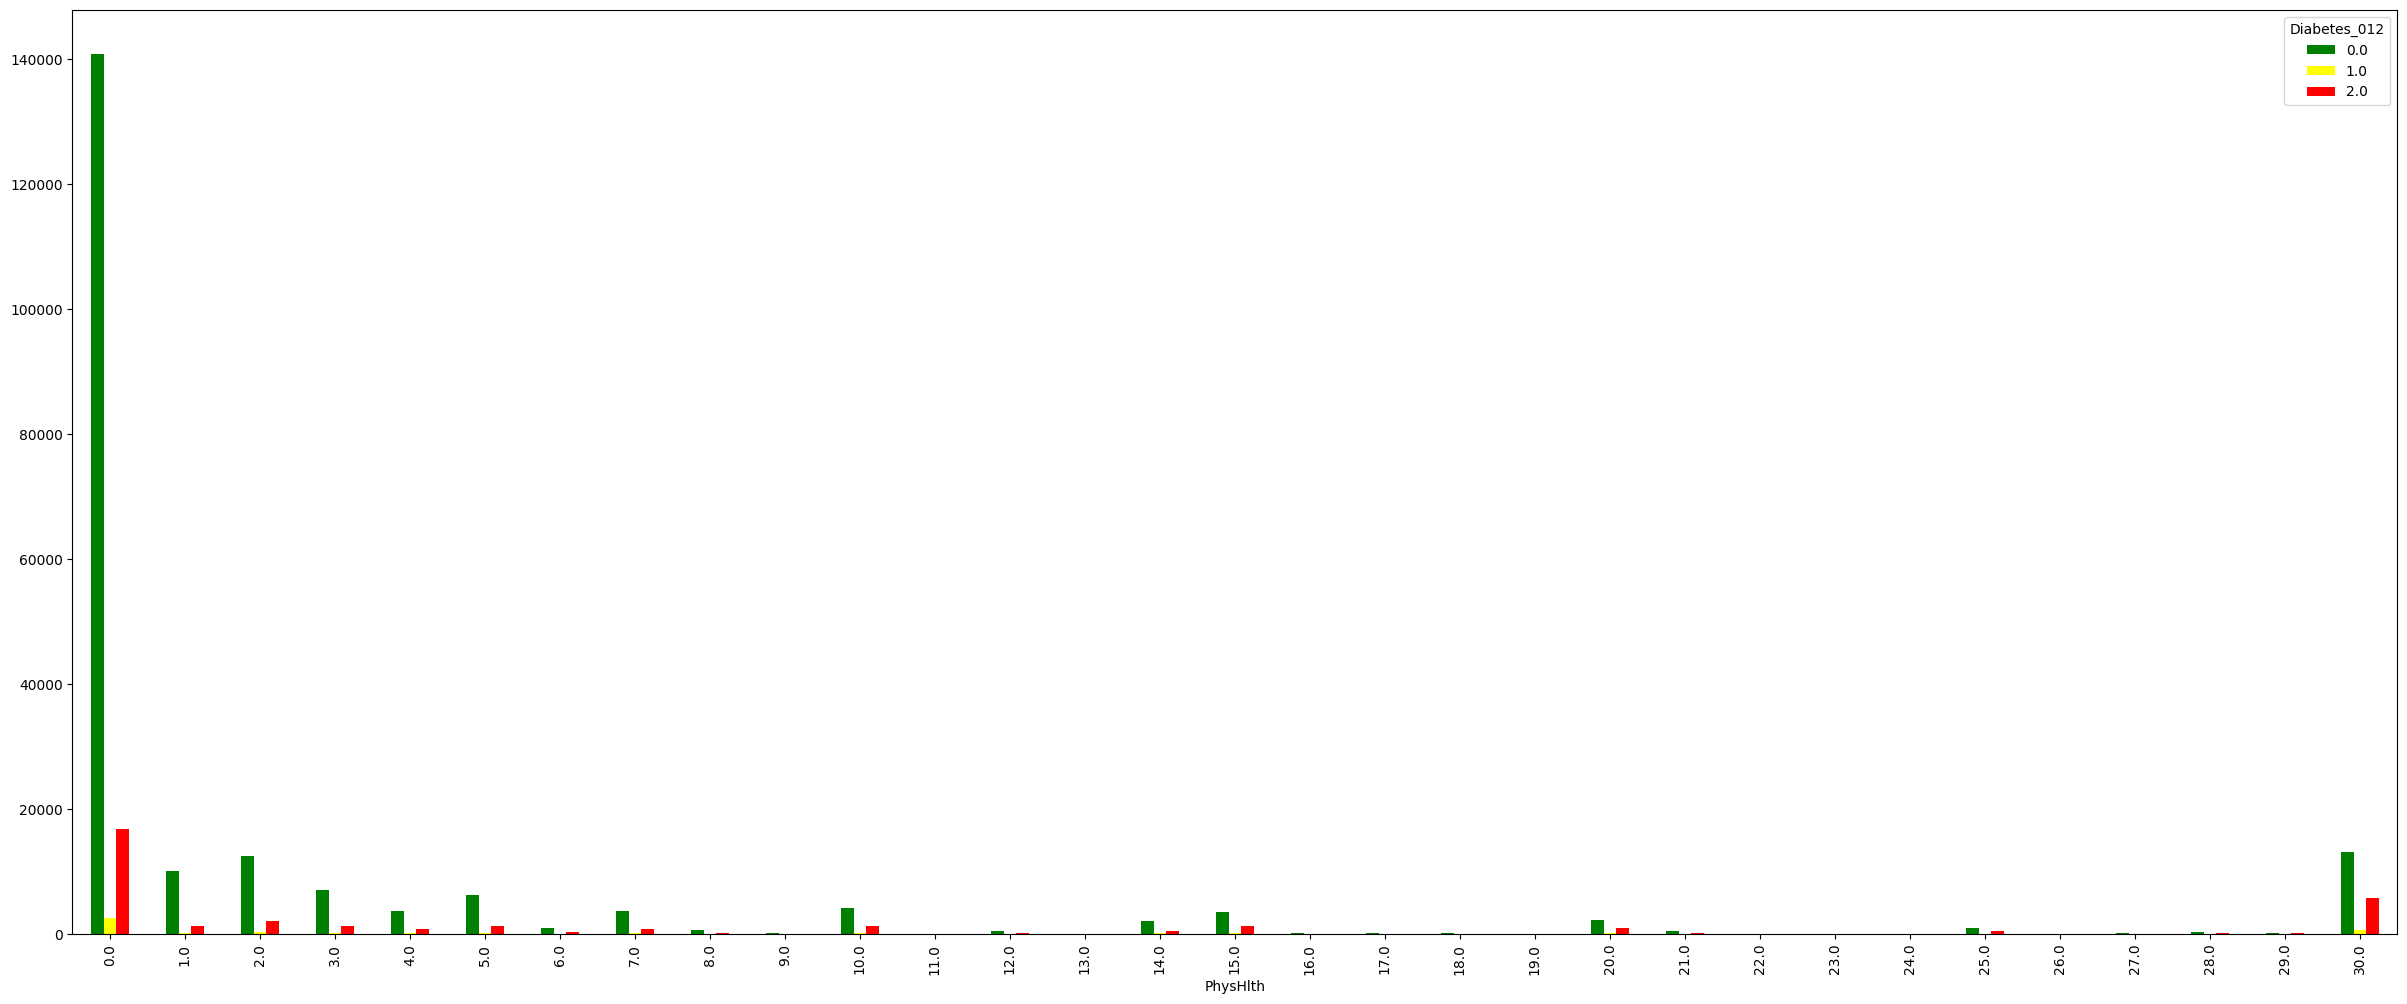

<Figure size 500x300 with 0 Axes>

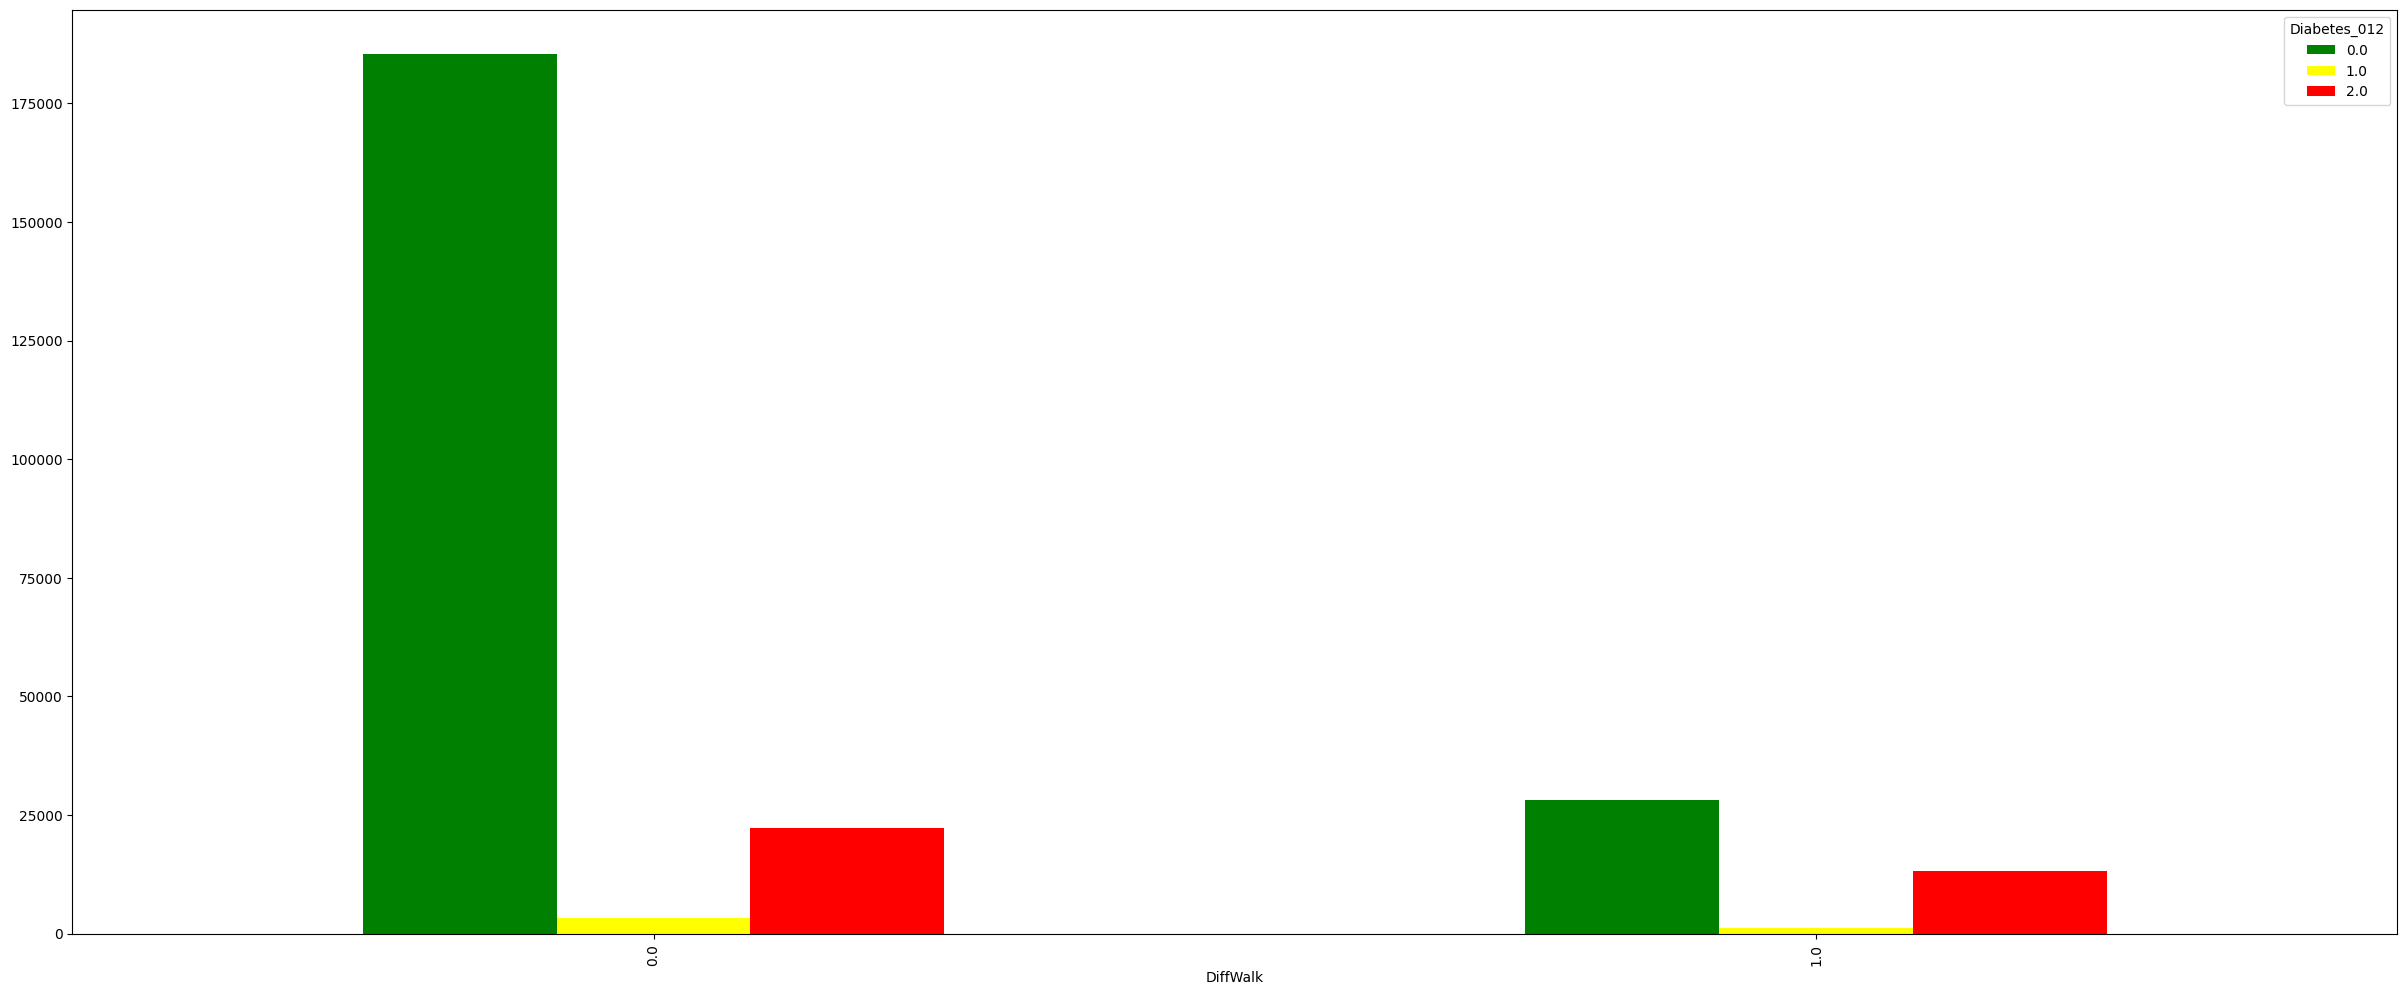

<Figure size 500x300 with 0 Axes>

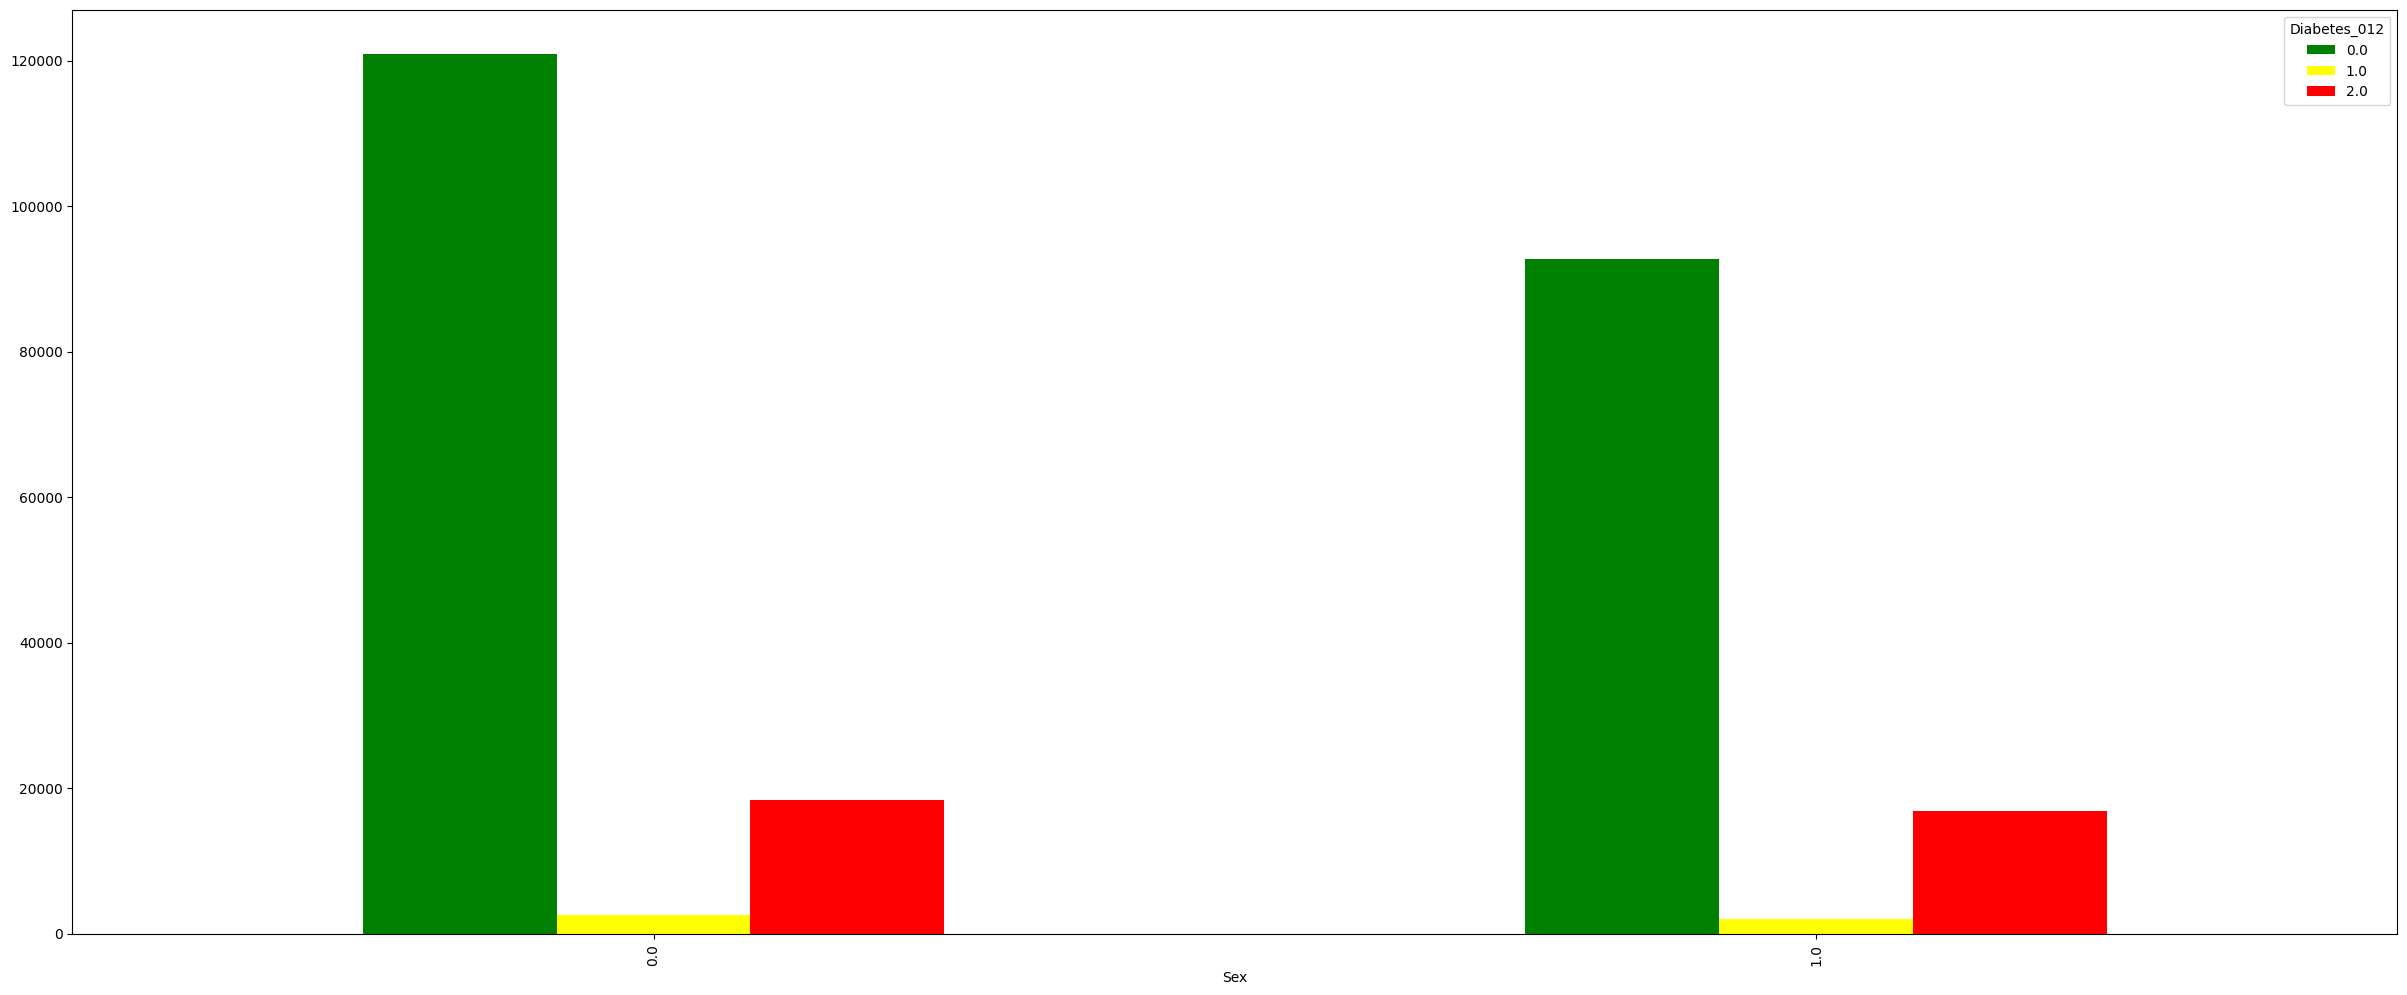

<Figure size 500x300 with 0 Axes>

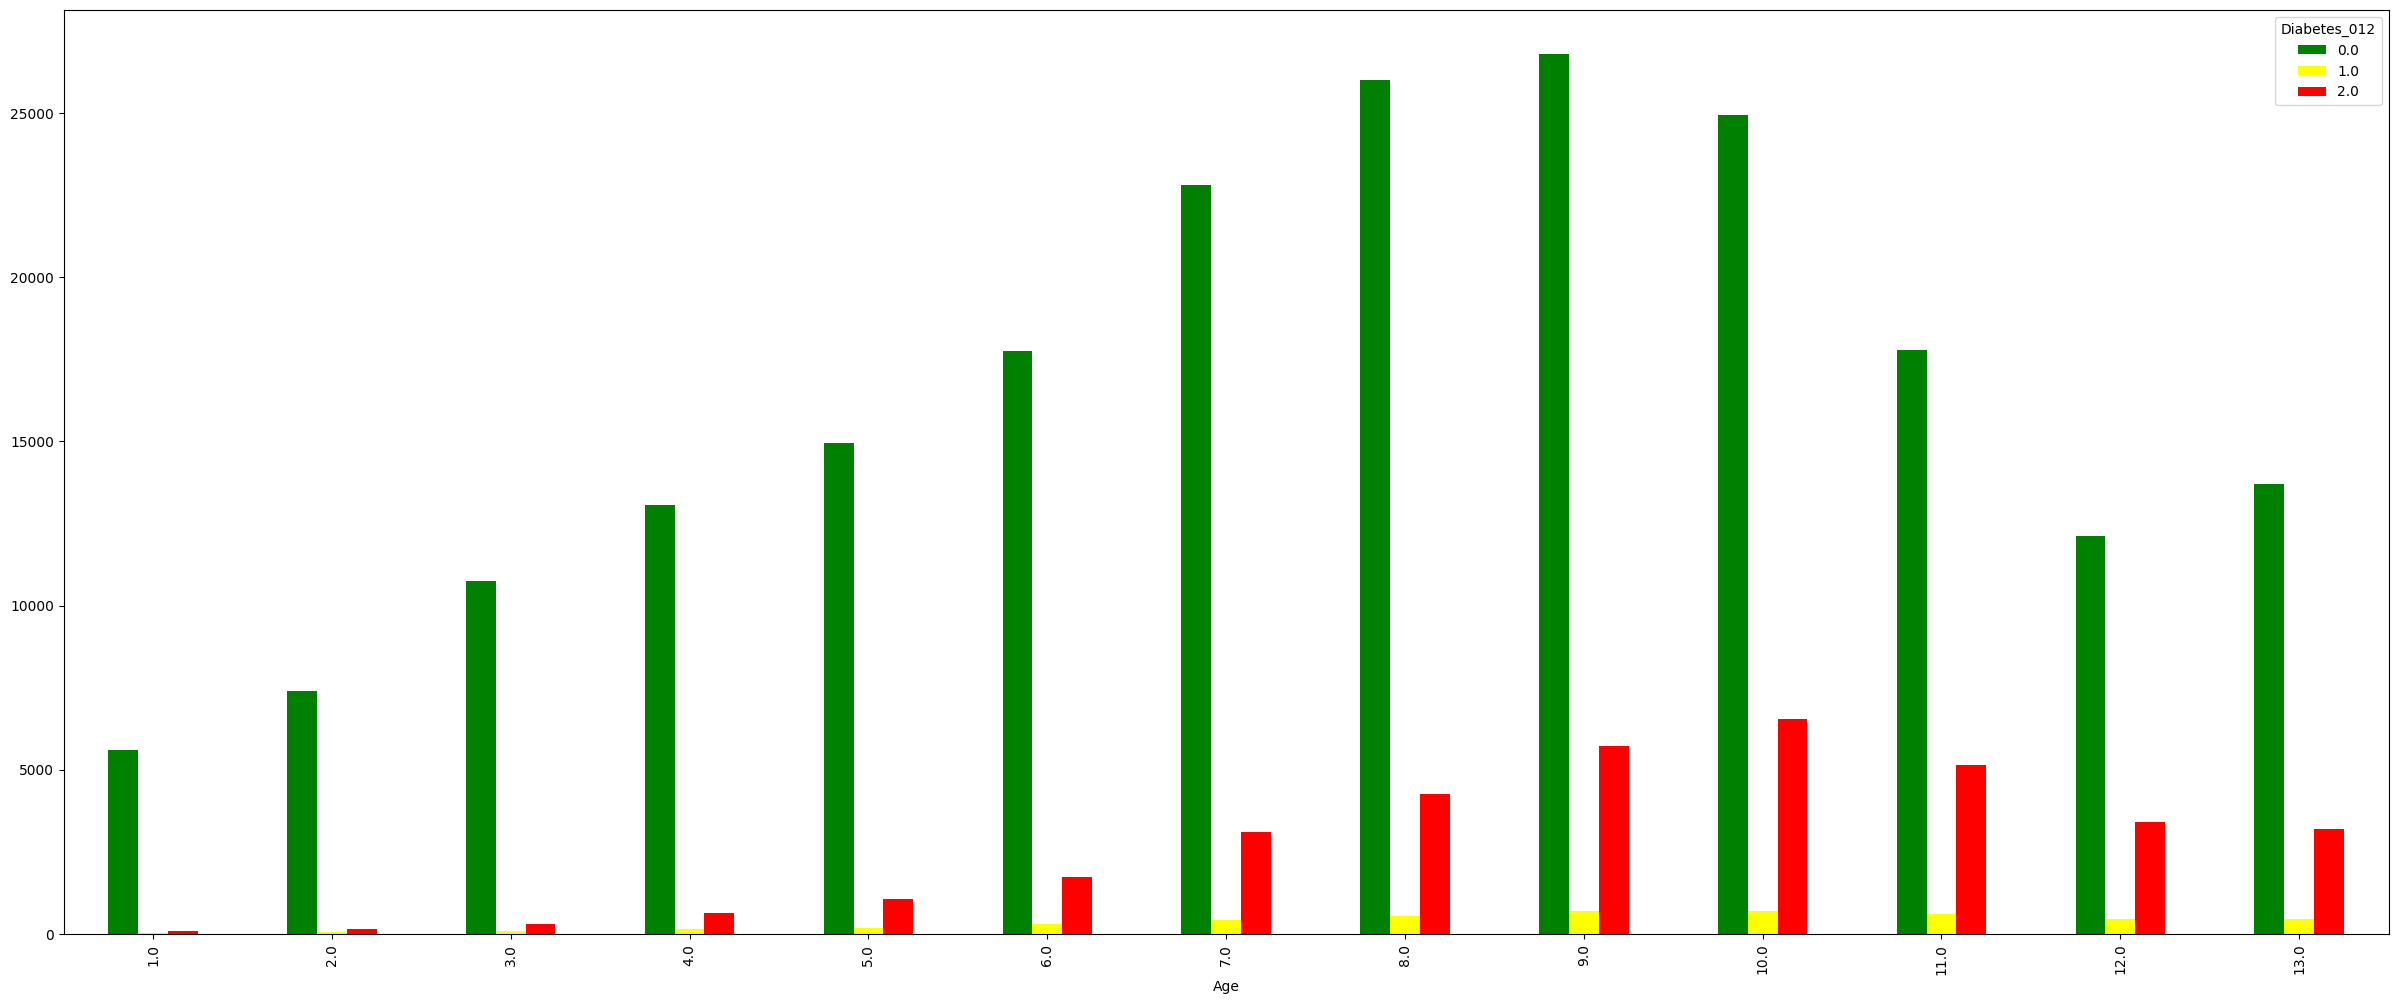

<Figure size 500x300 with 0 Axes>

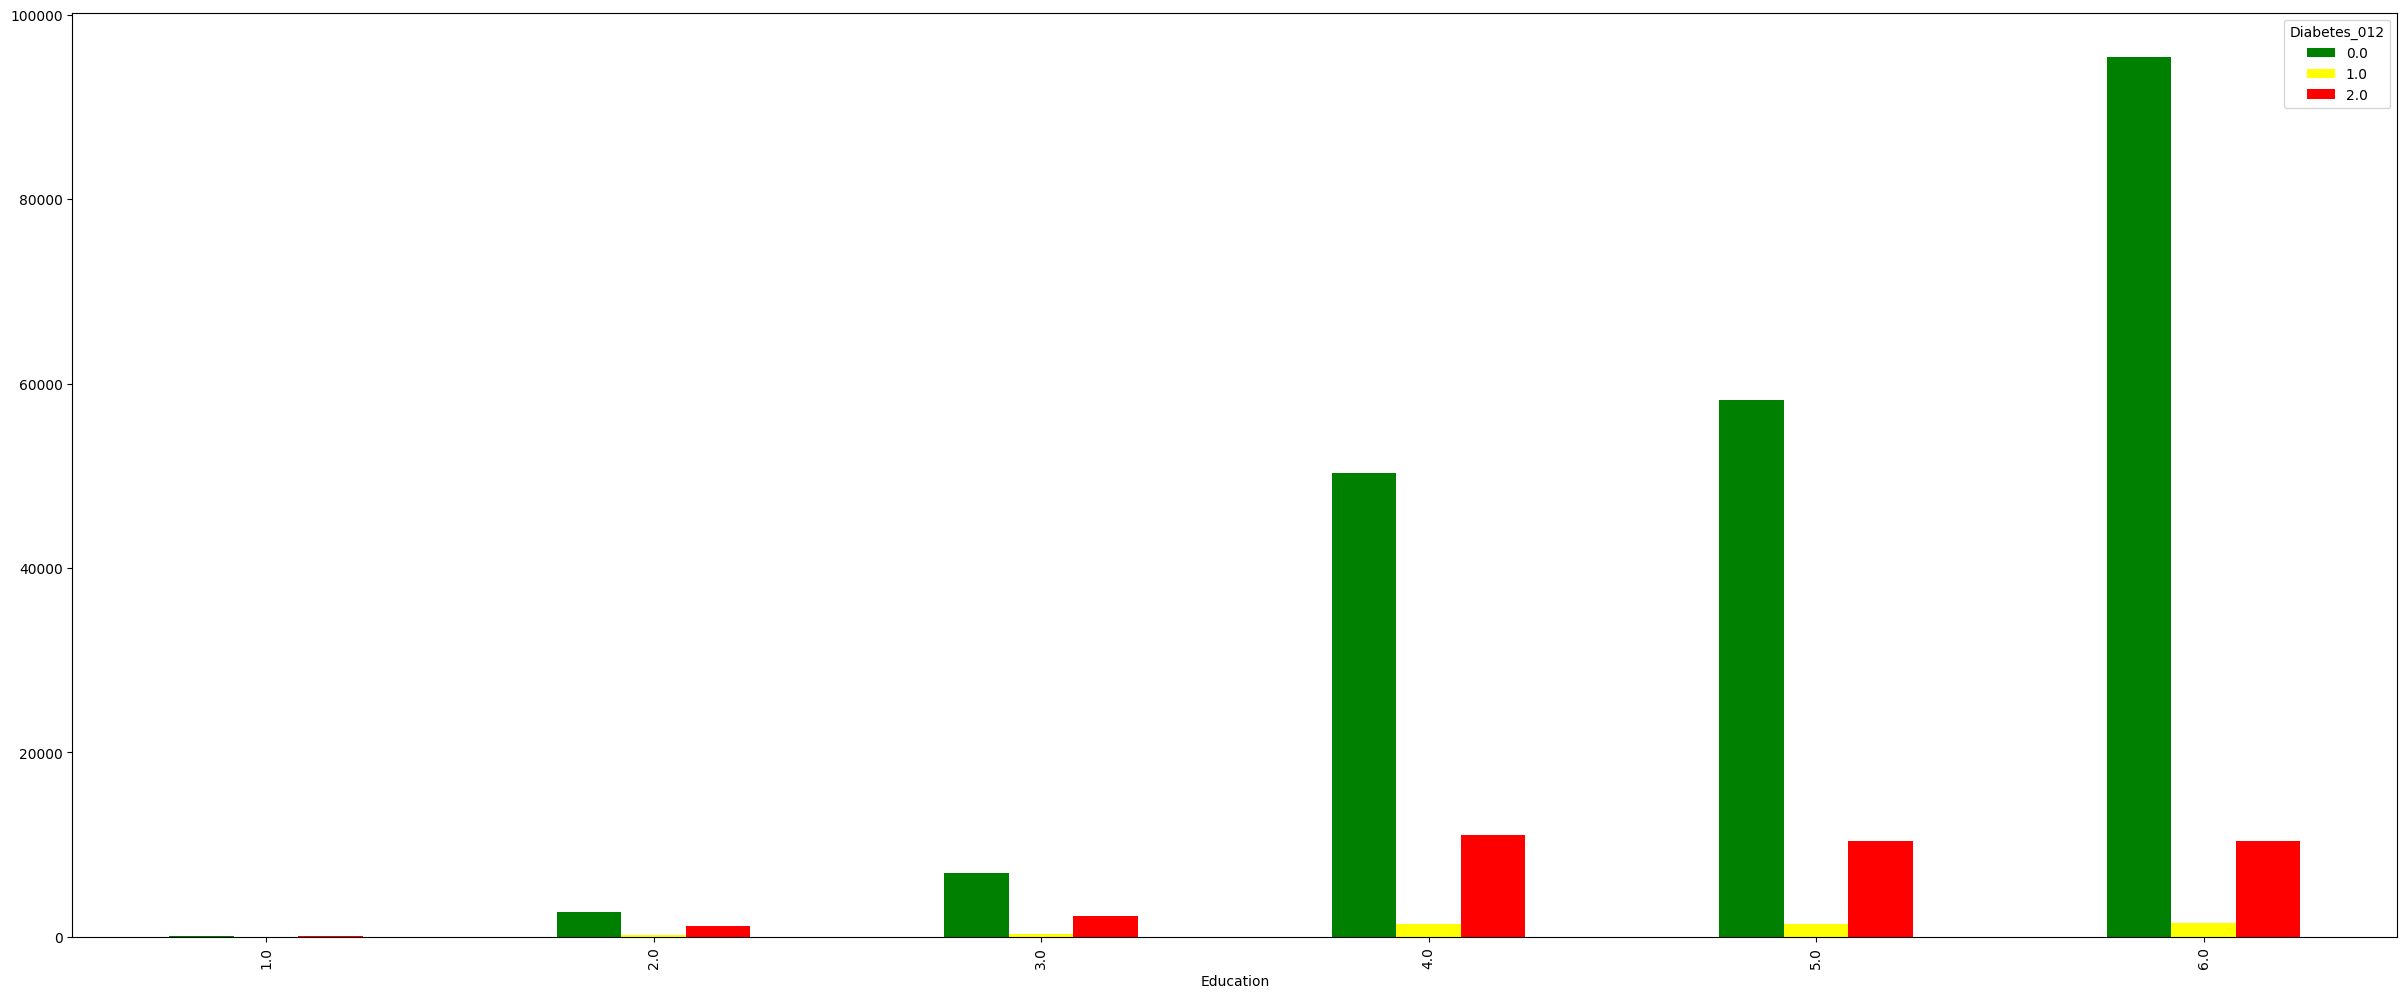

<Figure size 500x300 with 0 Axes>

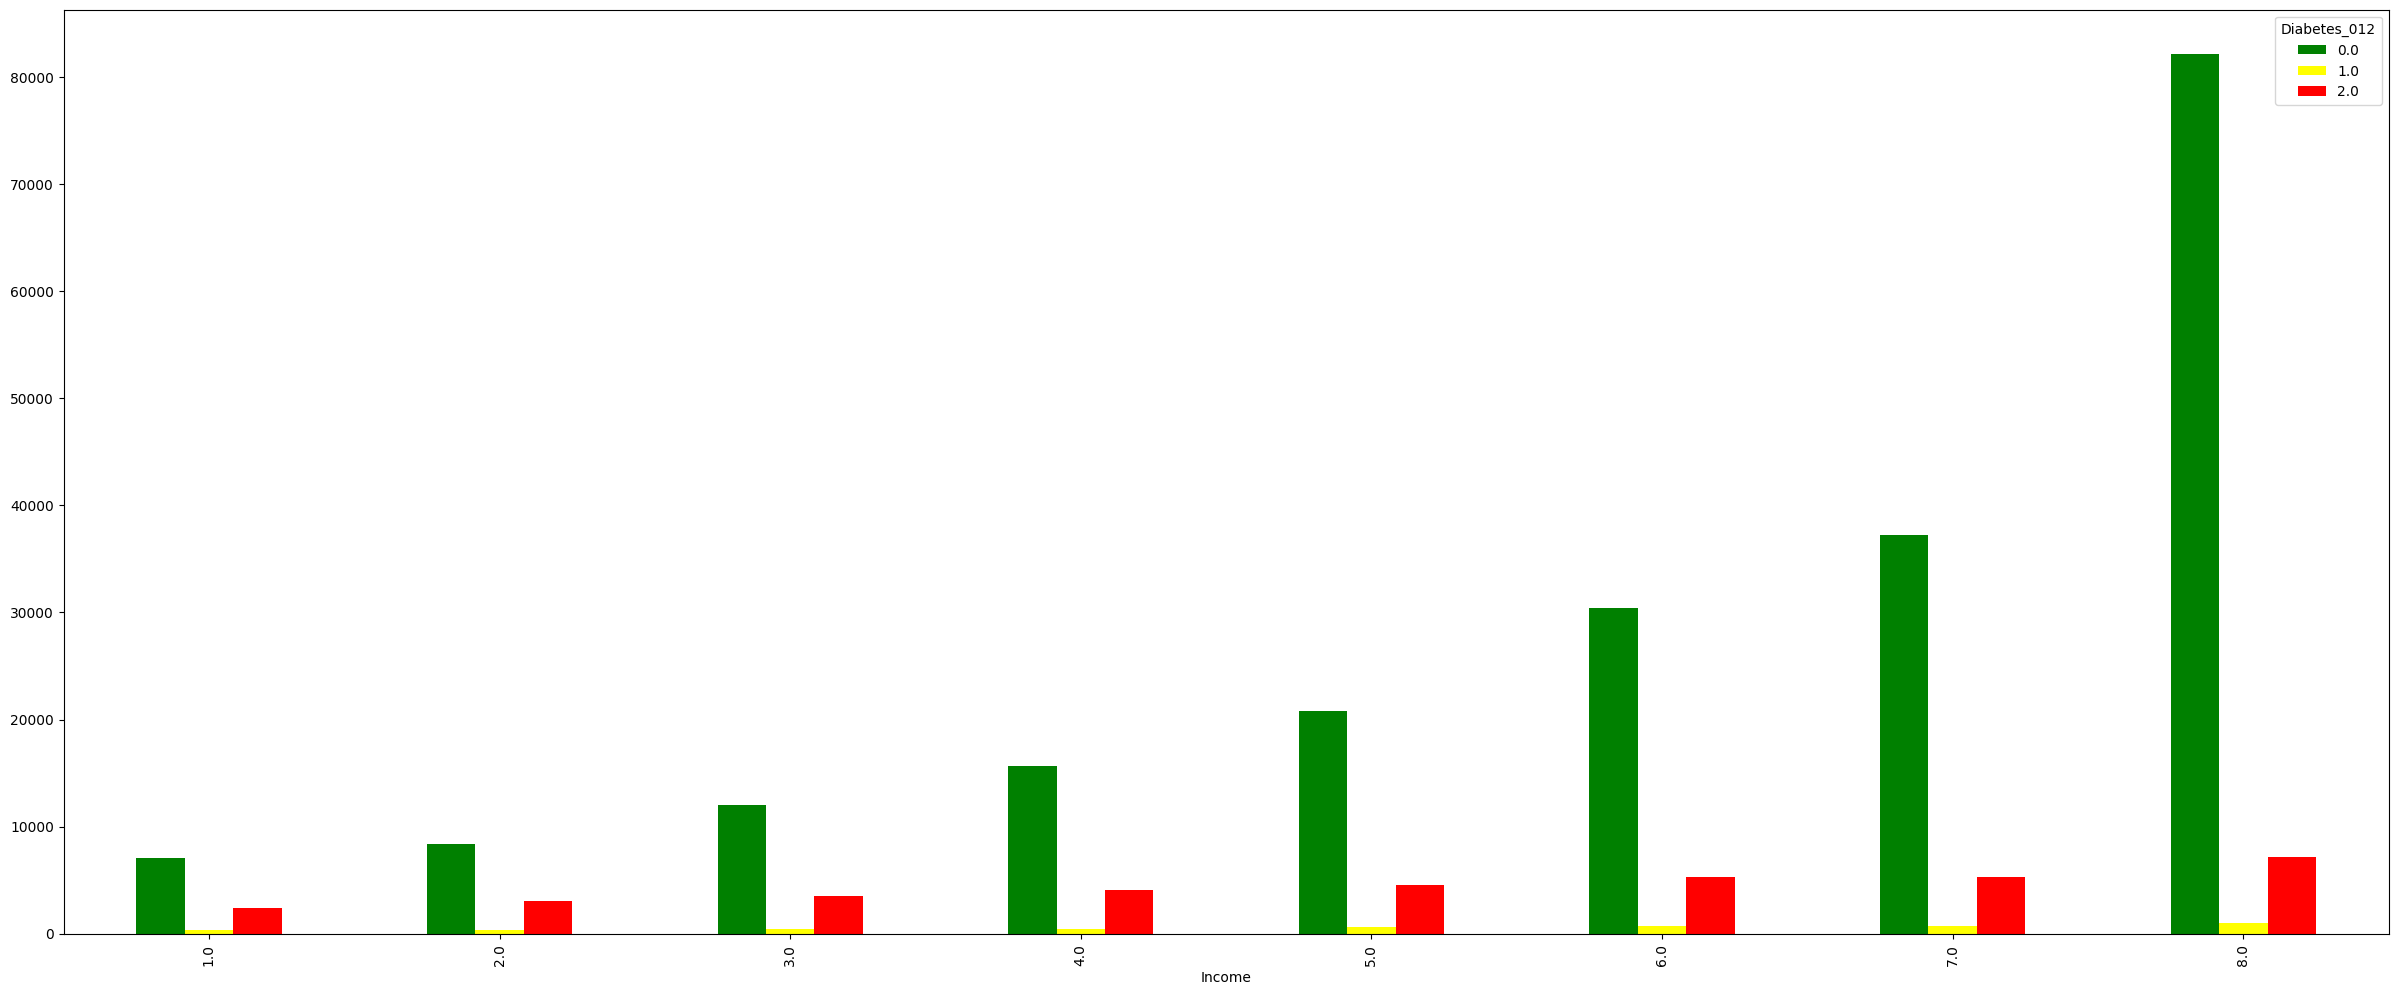

In [ ]:
#comparing all attributes with Diabetes_012
for i in attributes:
  plt.figure(figsize=(5,3))
  pd.crosstab(df[i],df.Diabetes_012).plot(kind="bar",figsize=(30,12),color=['green', 'yellow','red' ])

  plt.show()

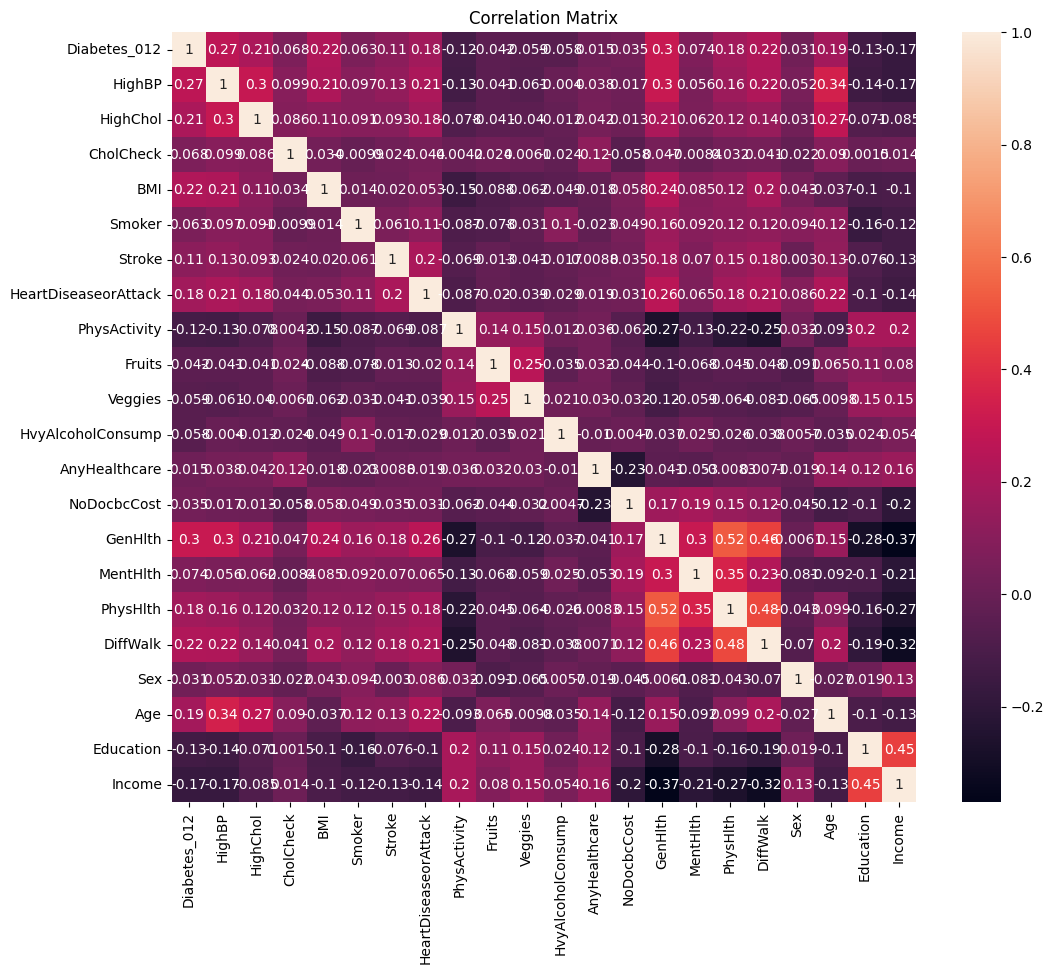

In [ ]:
# Multivariate Analysis

corr_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

outlier detection

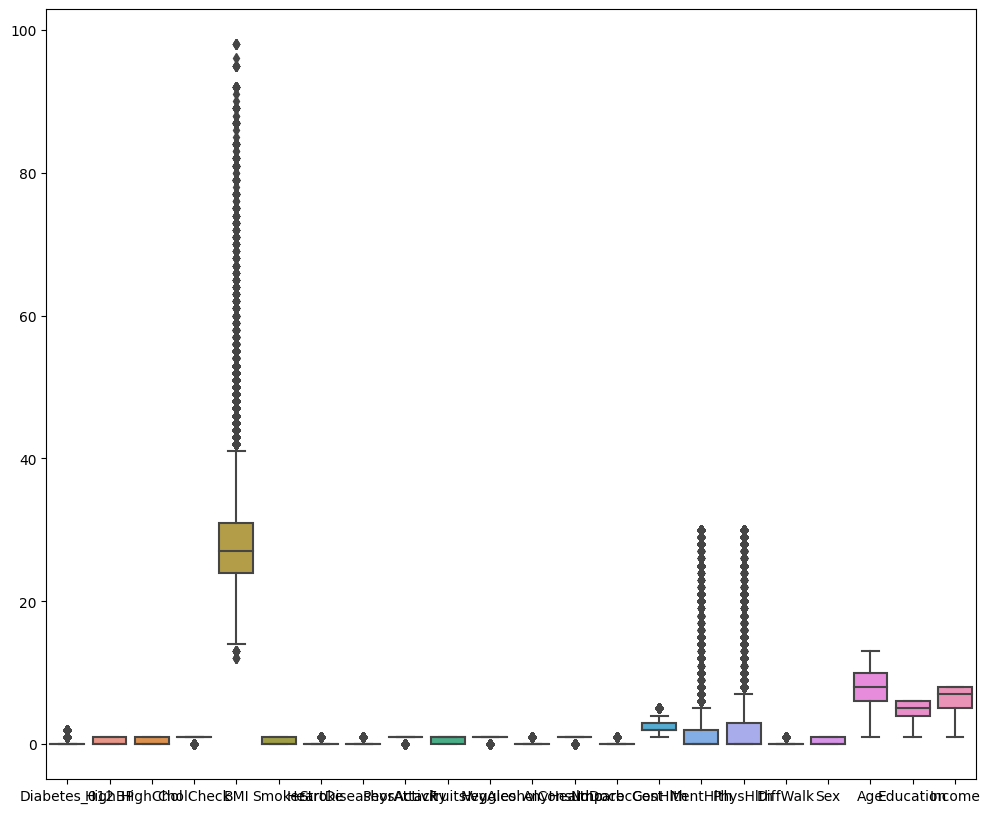

In [ ]:
#boxplot
sns.boxplot(df)
fig = plt.gcf()
fig.set_size_inches(12, 10)

# Display the plot
plt.show()

In [ ]:
up_outlier =['Stroke',	'HeartDiseaseorAttack','HvyAlcoholConsump','NoDocbcCost','GenHlth',	'MentHlth',	'PhysHlth',	'DiffWalk']

In [ ]:
low_outlier = ['CholCheck','PhysActivity','Veggies','AnyHealthcare']

<Axes: >

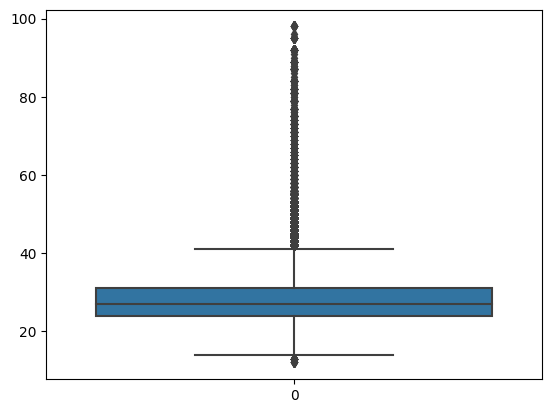

In [ ]:
sns.boxplot(df.BMI)

In [ ]:
#outlier removal by replacement with median
q1=df.BMI.quantile(0.25) # q1
q3=df.BMI.quantile(0.75) # q3
IQR=q3-q1

upper_limit=q3+1.5*IQR  # upper linit value

lower_limit=q1-1.5*IQR


In [ ]:
df['BMI'].median()

27.0

In [ ]:
df['BMI']=np.where(df['BMI']>upper_limit,27,df['BMI'])
df['BMI']=np.where(df['BMI']<lower_limit,27,df['BMI'])


<Axes: >

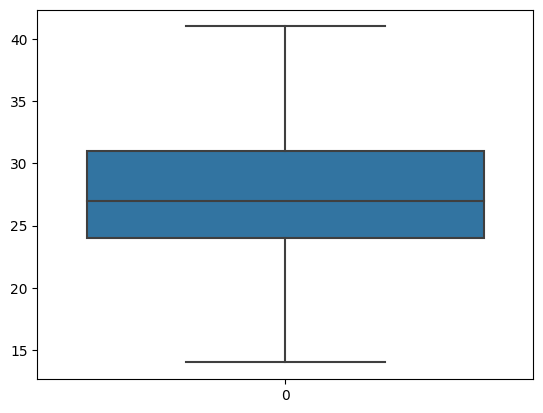

In [ ]:
sns.boxplot(df.BMI)

In [ ]:
#outlier removal by replacement with median
for i in up_outlier:
  q1=df[i].quantile(0.25) # q1
  q3=df[i].quantile(0.75) # q3
  IQR=q3-q1
  upper_limit=q3+1.5*IQR  # upper linit value
  lower_limit=q1-1.5*IQR
  df[i]=np.where(df[i]>upper_limit,df[i].median(),df[i])


In [ ]:
for i in low_outlier:
  q1=df[i].quantile(0.25) # q1
  q3=df[i].quantile(0.75) # q3
  IQR=q3-q1
  upper_limit=q3+1.5*IQR  # upper linit value
  lower_limit=q1-1.5*IQR
  df[i]=np.where(df[i]<lower_limit,df[i].median(),df[i])


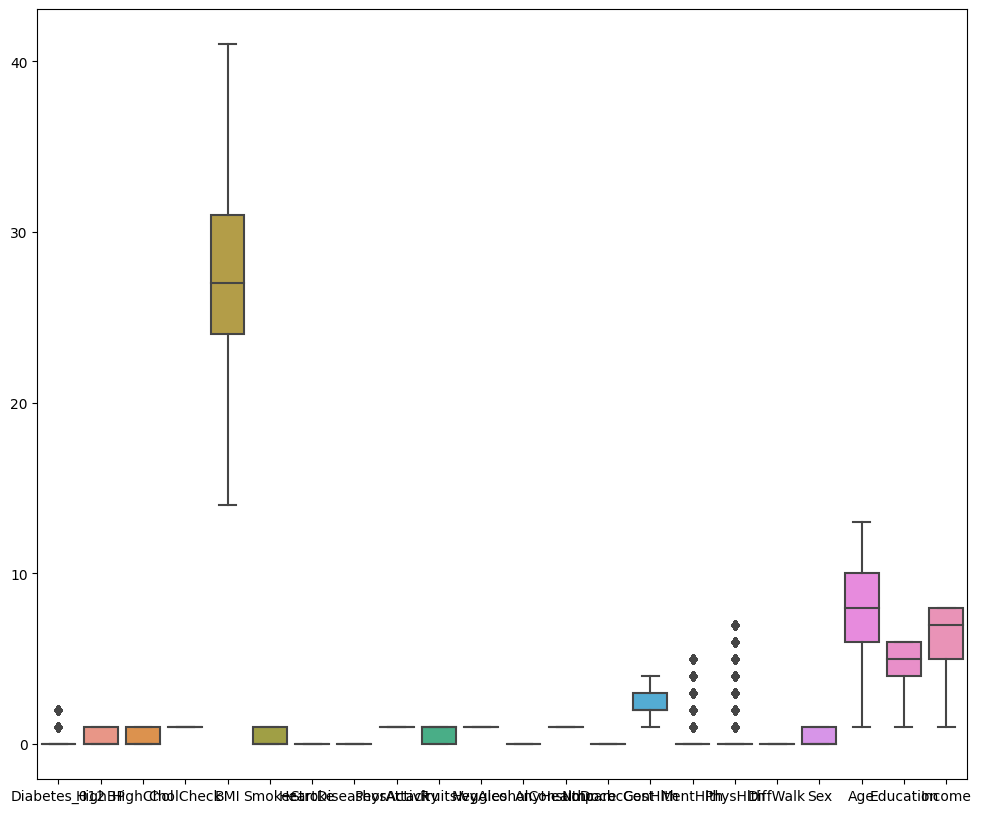

In [ ]:
sns.boxplot(df)
fig = plt.gcf()
fig.set_size_inches(12, 10)

plt.show()

In [ ]:
  q1=df['PhysHlth'].quantile(0.25) # q1
  q3=df['PhysHlth'].quantile(0.75) # q3
  IQR=q3-q1
  upper_limit=q3+1.5*IQR  # upper linit value
  lower_limit=q1-1.5*IQR
  df['PhysHlth']=np.where(df['PhysHlth']>upper_limit,df['PhysHlth'].median(),df['PhysHlth'])

In [ ]:
  q1=df['MentHlth'].quantile(0.25) # q1
  q3=df['MentHlth'].quantile(0.75) # q3
  IQR=q3-q1
  upper_limit=q3+1.5*IQR  # upper linit value
  lower_limit=q1-1.5*IQR
  df['MentHlth']=np.where(df['MentHlth']>upper_limit,df['MentHlth'].median(),df['MentHlth'])

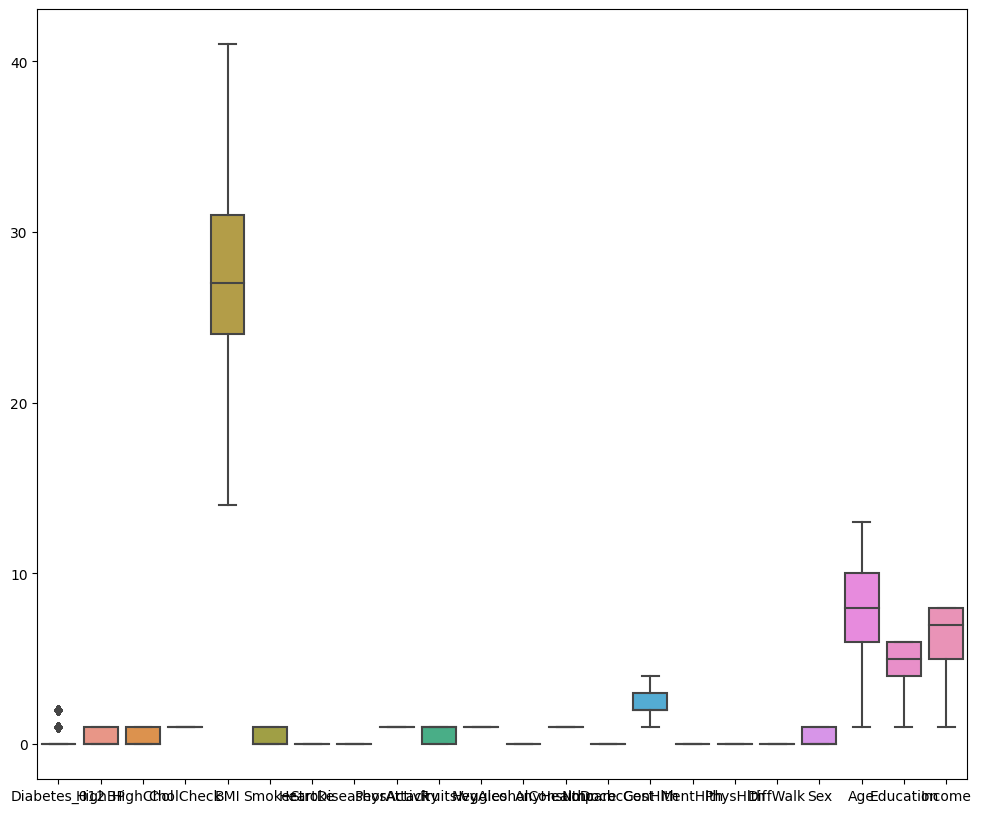

In [ ]:
sns.boxplot(df)
fig = plt.gcf()
fig.set_size_inches(12, 10)

plt.show()

x and y split

In [ ]:
x=df.iloc[:,1:]
x.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,3.0
1,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
y=df.Diabetes_012
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_012, dtype: float64

In [ ]:
y.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

balancing the imbalance dataset

In [ ]:
#balancing the data
smote=SMOTE()

In [ ]:
x_smote,y_smote = smote.fit_resample(x,y)

In [ ]:
y_smote.value_counts()

0.0    213703
2.0    213703
1.0    213703
Name: Diabetes_012, dtype: int64

train test split


In [ ]:
# train test split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.3,random_state=47)

In [ ]:
x_train.shape

(448776, 21)

scaling

In [ ]:
# scaling independent variables
scale = MinMaxScaler()

In [ ]:
x_train_scaled= pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
x_test_scaled= pd.DataFrame(scale.fit_transform(x_test),columns=x_test.columns)

logestic regression

In [ ]:

## Model building

model1 = LogisticRegression()


In [ ]:
model1.fit(x_train_scaled,y_train)

LogisticRegression()

In [ ]:
y_pred1 = model1.predict(x_test_scaled)

In [ ]:
y_pred1_train =  model1.predict(x_train_scaled)

In [ ]:
print('Testing Accuracy = ', accuracy_score(y_test,y_pred1))
print('Training Accuracy = ', accuracy_score(y_train,y_pred1_train))

Testing Accuracy =  0.5076663911029309
Training Accuracy =  0.5078034475996934


In [ ]:
pd.crosstab(y_test,y_pred1)

col_0,0.0,1.0,2.0
Diabetes_012,,,
0.0,42438,8602,13177
1.0,17822,14855,31431
2.0,11428,12232,40348


In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       0.59      0.66      0.62     64217
         1.0       0.42      0.23      0.30     64108
         2.0       0.47      0.63      0.54     64008

    accuracy                           0.51    192333
   macro avg       0.49      0.51      0.49    192333
weighted avg       0.49      0.51      0.49    192333



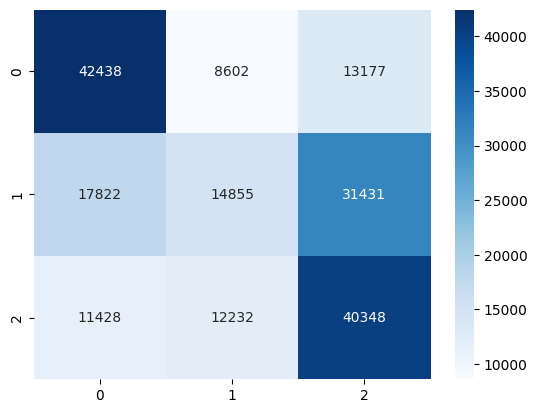

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Plot the confusion matrix using Seaborn's heatmap
cm = confusion_matrix(y_test,y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.show()

In [ ]:
# testing on random observation

model1.predict([[1,	1,	1,	30,	1,	0,	1,	0,	1,	1,	0,	1,	0,	5,	30,	30,	1,	0,	9,	5,	1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2.])

knn

In [ ]:
# model building -2

model2 = KNeighborsClassifier()

In [ ]:
model2.fit(x_train_scaled,y_train)


KNeighborsClassifier()

In [ ]:
y_pred2= model2.predict(x_test_scaled)

In [ ]:
y_pred2_train =  model2.predict(x_train_scaled)

In [ ]:
print('Testing Accuracy = ', accuracy_score(y_test,y_pred2))
print('Training Accuracy = ', accuracy_score(y_train,y_pred2_train))

Testing Accuracy =  0.8205664134599887
Training Accuracy =  0.8816759363245806


In [ ]:
pd.crosstab(y_test,y_pred2)

col_0,0.0,1.0,2.0
Diabetes_012,,,
0.0,51158,2716,10343
1.0,1285,61188,1635
2.0,9534,8998,45476


In [ ]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.81     64217
         1.0       0.84      0.95      0.89     64108
         2.0       0.79      0.71      0.75     64008

    accuracy                           0.82    192333
   macro avg       0.82      0.82      0.82    192333
weighted avg       0.82      0.82      0.82    192333



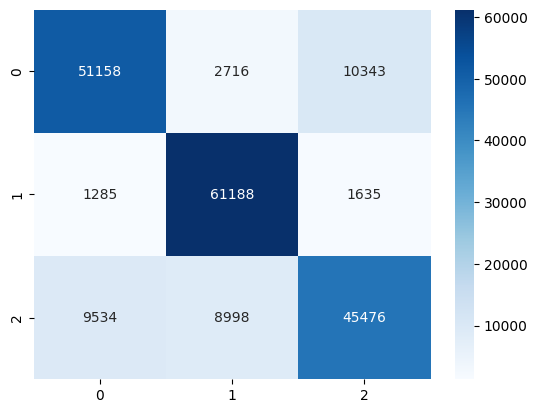

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Plot the confusion matrix using Seaborn's heatmap
cm2 = confusion_matrix(y_test,y_pred2)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.show()

In [ ]:
# testing on random observation

model2.predict([[1,	1,	1,	26,	1,	0,	1,	0,	1,	1,	0,	1,	0,	5,	30,	30,	1,	0,	9,	5,	1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([2.])

naive bayes

In [ ]:
model3 = GaussianNB()


In [ ]:
model3.fit(x_train_scaled,y_train)


GaussianNB()

In [ ]:
y_pred3 = model3.predict(x_test_scaled)


In [ ]:
y_pred3_train = model3.predict(x_train_scaled)

In [ ]:

print("Test accuracy", accuracy_score(y_test,y_pred3))
print("Train accuracy", accuracy_score(y_train,y_pred3_train))

Test accuracy 0.5113059121419621
Train accuracy 0.5119591956789133


In [ ]:
pd.crosstab(y_test,y_pred3)

col_0,0.0,1.0,2.0
Diabetes_012,,,
0.0,42975,7094,14148
1.0,18040,13005,33063
2.0,11843,9804,42361


In [ ]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63     64217
         1.0       0.43      0.20      0.28     64108
         2.0       0.47      0.66      0.55     64008

    accuracy                           0.51    192333
   macro avg       0.50      0.51      0.49    192333
weighted avg       0.50      0.51      0.49    192333



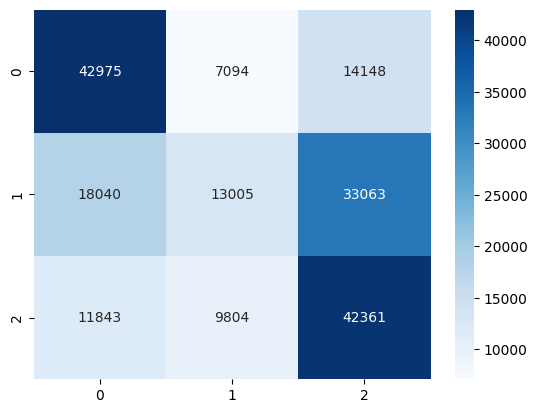

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Plot the confusion matrix using Seaborn's heatmap
cm3 = confusion_matrix(y_test,y_pred3)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.show()

In [ ]:
# testing on random observation

model3.predict([[1,	1,	1,	30,	1,	0,	1,	0,	1,	1,	0,	1,	0,	5,	30,	30,	1,	0,	9,	5,	1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1.])

decision tree

In [ ]:
model4 = DecisionTreeClassifier(max_depth=12)

In [ ]:
model4.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=12)

In [ ]:
y_pred4 = model4.predict(x_test_scaled)


In [ ]:
y_pred4_train = model4.predict(x_train_scaled)

In [ ]:
print("Test accuracy", accuracy_score(y_test,y_pred4))
print("Train accuracy", accuracy_score(y_train,y_pred4_train))


Test accuracy 0.6845471135998502
Train accuracy 0.6935910119970765


In [ ]:
pd.crosstab(y_test,y_pred4)

col_0,0.0,1.0,2.0
Diabetes_012,,,
0.0,50924,1947,11346
1.0,5532,43746,14830
2.0,10585,16432,36991


In [ ]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

         0.0       0.76      0.79      0.78     64217
         1.0       0.70      0.68      0.69     64108
         2.0       0.59      0.58      0.58     64008

    accuracy                           0.68    192333
   macro avg       0.68      0.68      0.68    192333
weighted avg       0.68      0.68      0.68    192333



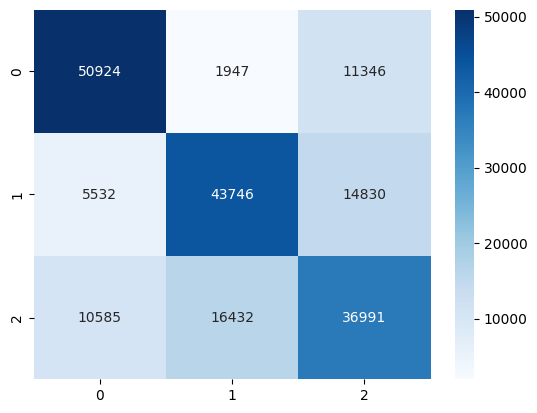

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Plot the confusion matrix using Seaborn's heatmap
cm4 = confusion_matrix(y_test,y_pred4)
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.show()

In [ ]:
# testing on random observation

model4.predict([[1,	1,	1,	30,	1,	0,	1,	0,	1,	1,	0,	1,	0,	5,	30,	30,	1,	0,	9,	5,	1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2.])

random forest

In [ ]:
model5 =RandomForestClassifier(max_depth = 12,n_estimators = 10, random_state=47)

In [ ]:
model5.fit(x_train_scaled,y_train)

RandomForestClassifier(max_depth=12, n_estimators=10, random_state=47)

In [ ]:
y_pred5 = model5.predict(x_test_scaled)


In [ ]:
y_pred5_train = model5.predict(x_train_scaled)

In [ ]:
print("Test accuracy", accuracy_score(y_test,y_pred5))
print("Train accuracy", accuracy_score(y_train,y_pred5_train))


Test accuracy 0.7291364456437532
Train accuracy 0.7413475765192434


In [ ]:
pd.crosstab(y_test,y_pred5)

col_0,0.0,1.0,2.0
Diabetes_012,,,
0.0,50611,586,13020
1.0,2988,47276,13844
2.0,8231,13427,42350


In [ ]:
print(classification_report(y_test,y_pred5))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.80     64217
         1.0       0.77      0.74      0.75     64108
         2.0       0.61      0.66      0.64     64008

    accuracy                           0.73    192333
   macro avg       0.73      0.73      0.73    192333
weighted avg       0.73      0.73      0.73    192333



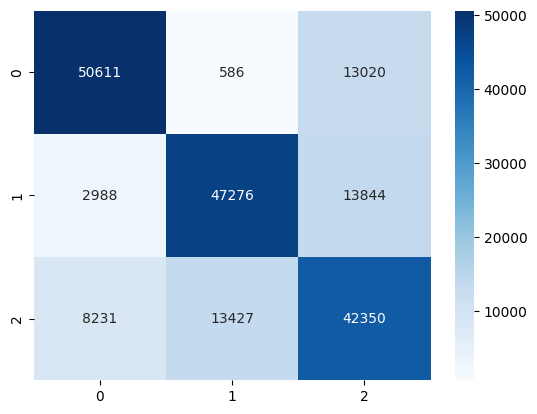

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Plot the confusion matrix using Seaborn's heatmap
cm5 = confusion_matrix(y_test,y_pred5)
sns.heatmap(cm5, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.show()

In [ ]:
# testing on random observation

model5.predict([[1,	1,	1,	26,	1,	0,	1,	0,	1,	1,	0,	1,	0,	5,	30,	30,	1,	0,	9,	5,	1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2.])

In [ ]:
import pickle

In [ ]:
pickle.dump(model5,open('db_prediction.pkl','wb'))
